In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import csv
import seaborn as sns
sns.set(style='whitegrid')
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi'] = 200
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot


C:\Users\pawar_d14dnwj\.conda\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Data Scraping

In [2]:
# Fetch historical data using yfinance
def get_oil_prices(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [3]:
symbol = "CL=F"  # Symbol for Crude Oil (Futures)
start_date = "2001-01-01"
end_date = "2024-02-01"

oil_prices_data = get_oil_prices(symbol, start_date, end_date)
oil_prices_data

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CL=F']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000023DA8CB7590>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
if not oil_prices_data.empty:
    filename = "C:\\Users\\pawar_d14dnwj\\Downloads\\1708434063303_oil_prices_yahoo.csv"
    oil_prices_data.to_csv(filename, index=True)
    print(f"Data saved to '{filename}' successfully.")
else:
    print("Failed to fetch data.")

Failed to fetch data.


## Data Exploration and Preprocessing

In [5]:
df=pd.read_csv("C:\\Users\\pawar_d14dnwj\\Downloads\\1708434063303_oil_prices_yahoo.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,27.250000,27.400000,26.600000,27.200001,27.200001,52321
1,2001-01-03,27.230000,28.139999,27.049999,27.950001,27.950001,66628
2,2001-01-04,28.200001,28.780001,27.850000,28.200001,28.200001,74383
3,2001-01-05,28.150000,28.799999,27.799999,28.000000,28.000000,63852
4,2001-01-08,28.200001,28.400000,27.150000,27.350000,27.350000,76058
...,...,...,...,...,...,...,...
5791,2024-01-25,75.300003,77.510002,75.160004,77.360001,77.360001,320177
5792,2024-01-26,77.150002,78.260002,76.059998,78.010002,78.010002,365456
5793,2024-01-29,78.900002,79.290001,76.410004,76.779999,76.779999,331925
5794,2024-01-30,77.019997,78.139999,75.849998,77.820000,77.820000,347242


In [6]:
#Selecting Required Columns
oil=df[['Date','Adj Close']]


In [7]:
oil

,Date,Adj Close
0,2001-01-02,27.200001
1,2001-01-03,27.950001
2,2001-01-04,28.200001
3,2001-01-05,28.000000
4,2001-01-08,27.350000
...,...,...
5791,2024-01-25,77.360001
5792,2024-01-26,78.010002
5793,2024-01-29,76.779999
5794,2024-01-30,77.820000


In [8]:
# Renaming The Column
oil.rename(columns={"Adj Close":"Price"},inplace=True)

In [9]:
# Change the index of the oil as Date index
oil.set_index('Date', inplace=True)

In [10]:
oil.head()


,Price
Date,
2001-01-02,27.200001
2001-01-03,27.950001
2001-01-04,28.200001
2001-01-05,28.000000
2001-01-08,27.350000


In [11]:
oil1=oil.fillna(oil.mean())

In [12]:
oil1

,Price
Date,
2001-01-02,27.200001
2001-01-03,27.950001
2001-01-04,28.200001
2001-01-05,28.000000
2001-01-08,27.350000
...,...
2024-01-25,77.360001
2024-01-26,78.010002
2024-01-29,76.779999


In [13]:
oil.index = pd.to_datetime(oil.index)

In [14]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5796 entries, 2001-01-02 to 2024-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5796 non-null   float64
dtypes: float64(1)
memory usage: 90.6 KB


In [15]:
oil.isnull().sum()

Price    0
dtype: int64

In [16]:
oil.dtypes

Price    float64
dtype: object

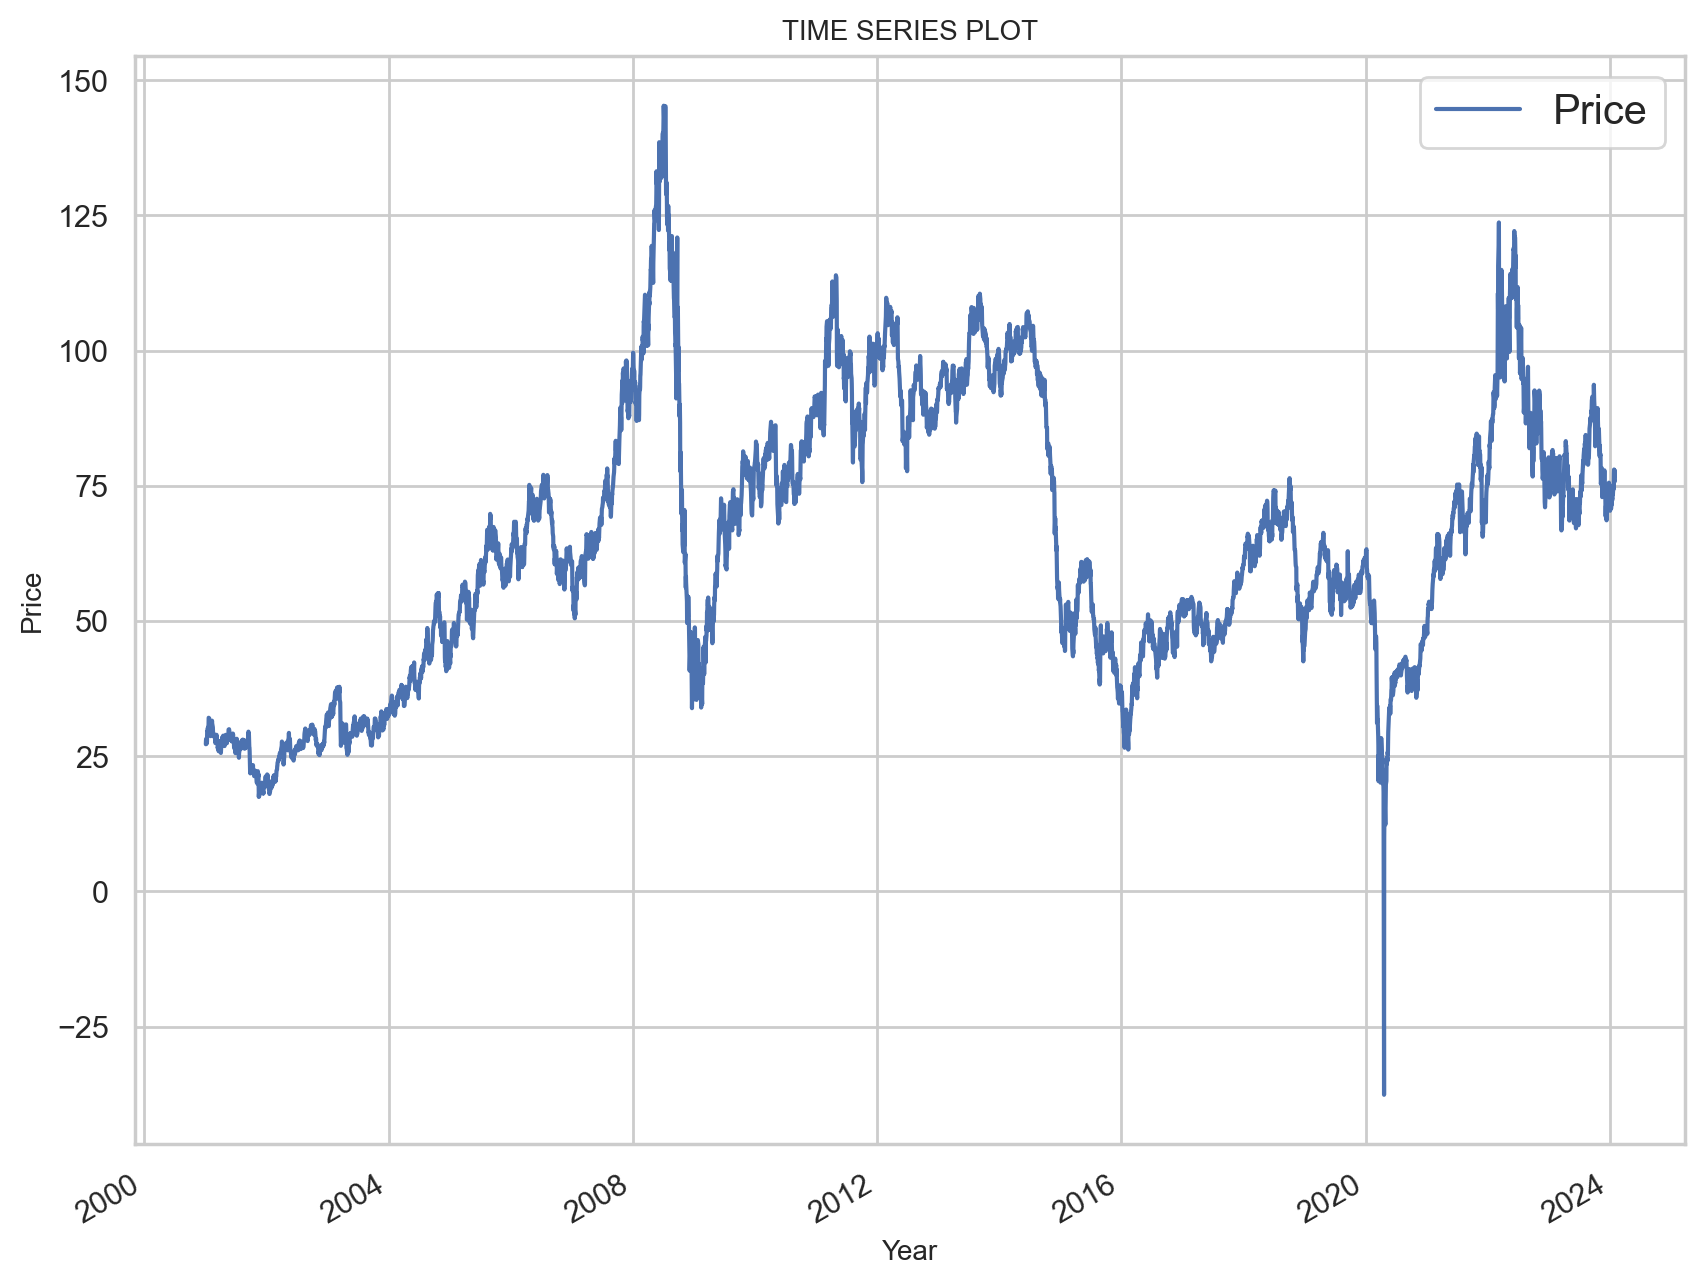

In [17]:
# Time Series Plot of oil price over the Years
oil.plot(grid=True)
plt.legend(fontsize=15)
plt.title("TIME SERIES PLOT",fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Price",fontsize=10)
plt.savefig('TimeSeries.png')

(0.0, 150.0)

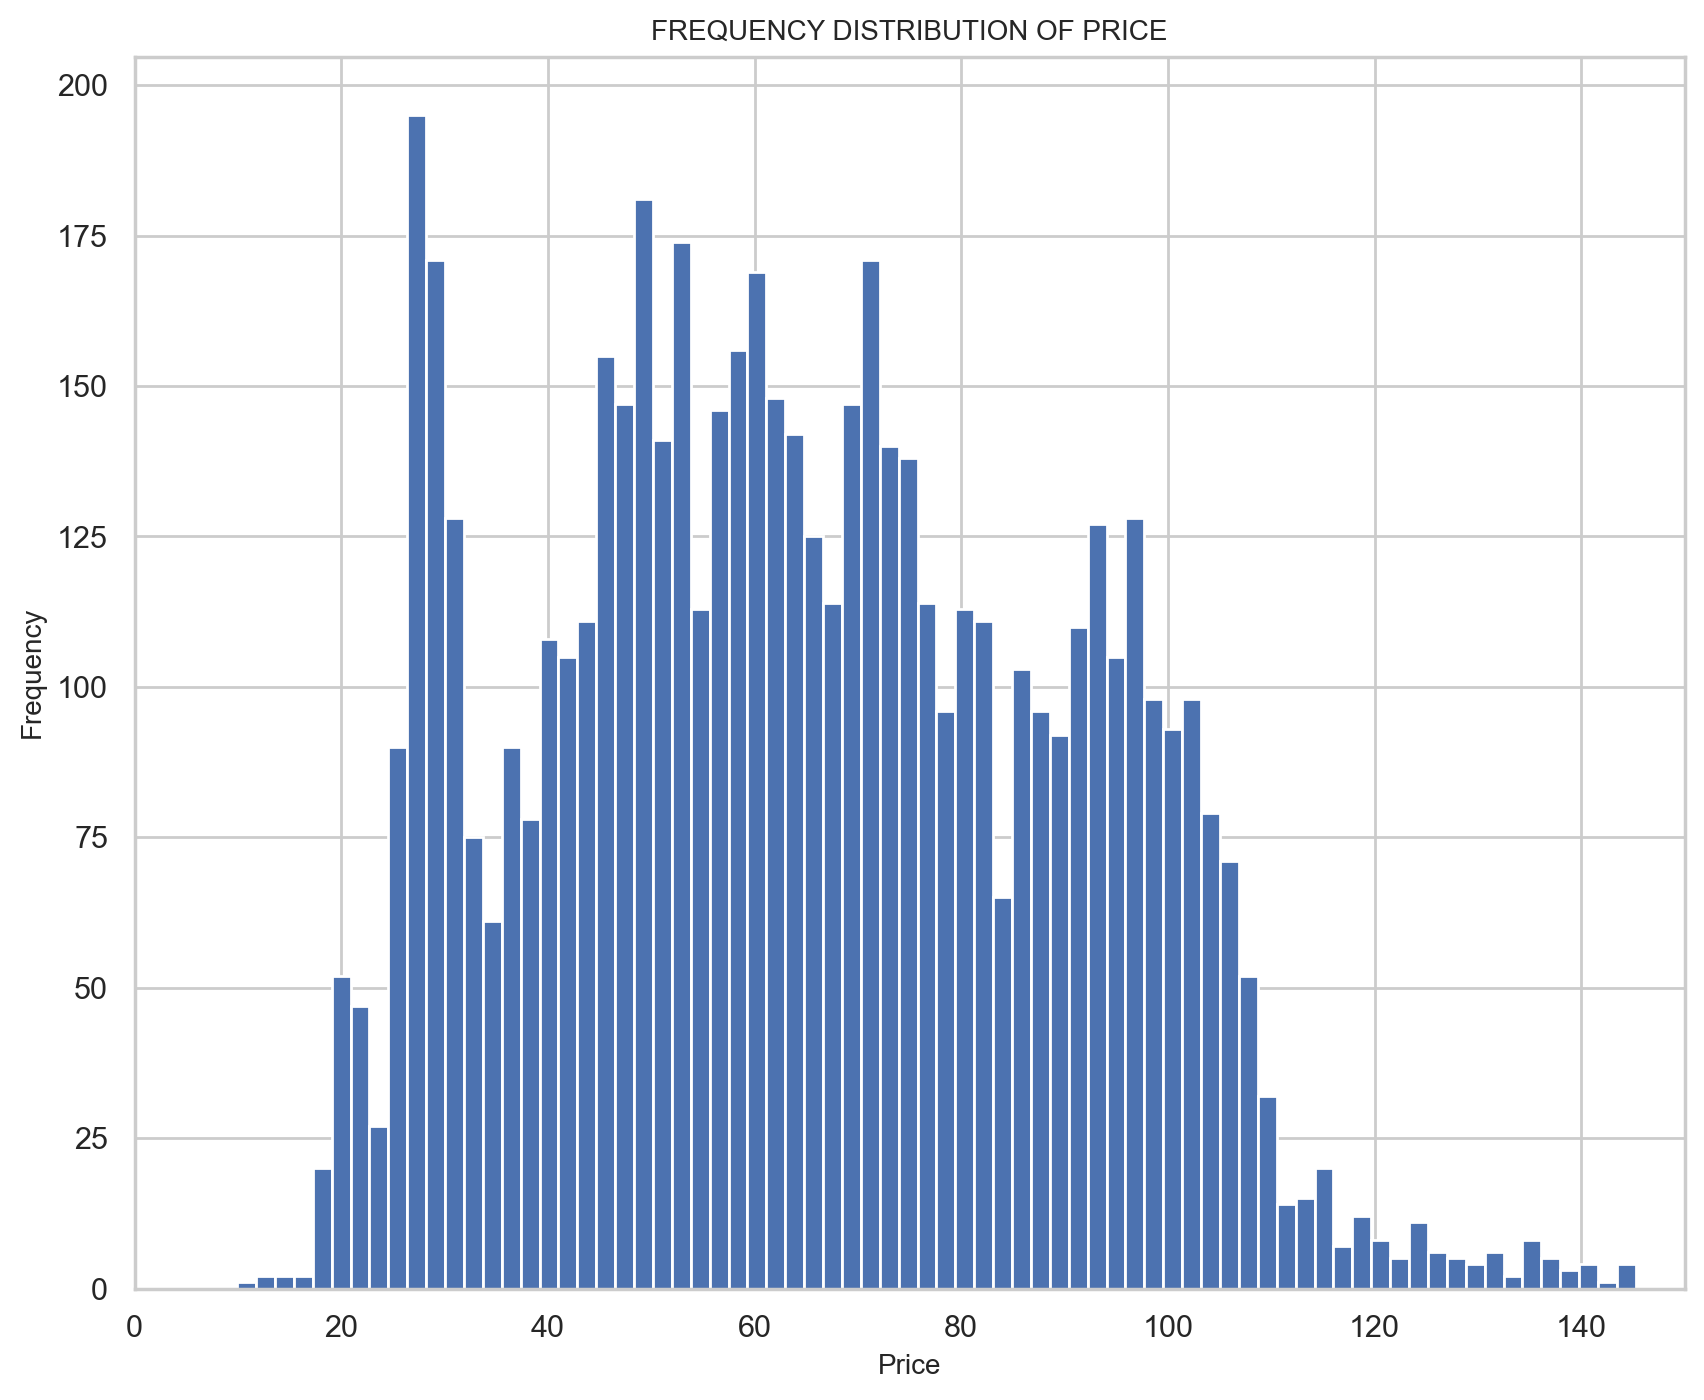

In [18]:
plt.hist(oil['Price'],bins=100)
plt.title("FREQUENCY DISTRIBUTION OF PRICE",fontsize=10)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.xlim([0,150])

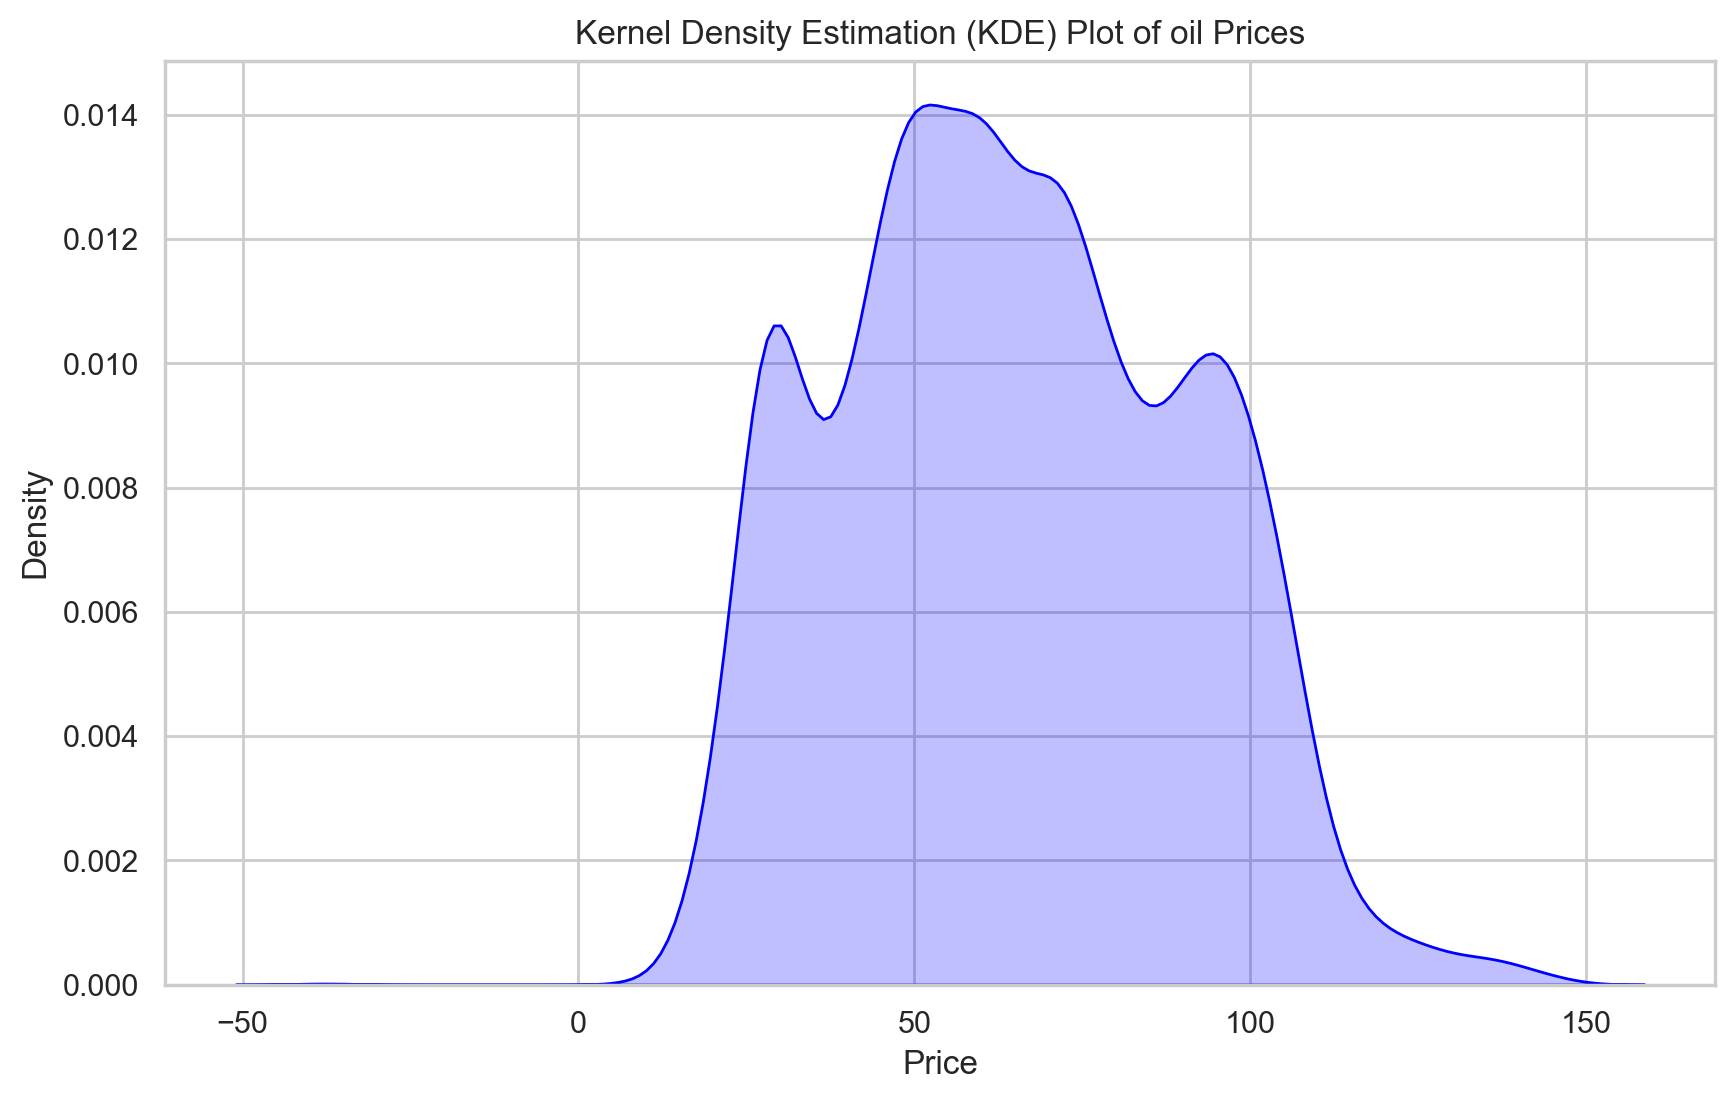

In [19]:
# Kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(oil['Price'], color='blue', fill=True)
plt.title('Kernel Density Estimation (KDE) Plot of oil Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.savefig('Density_plot.png')

In [20]:
# Daily Percentage Change
pct_change=oil[['Price']].pct_change()
pct_change

,Price
Date,
2001-01-02,NaN
2001-01-03,0.027574
2001-01-04,0.008945
2001-01-05,-0.007092
2001-01-08,-0.023214
...,...
2024-01-25,0.030230
2024-01-26,0.008402
2024-01-29,-0.015767


(-0.3, 0.3)

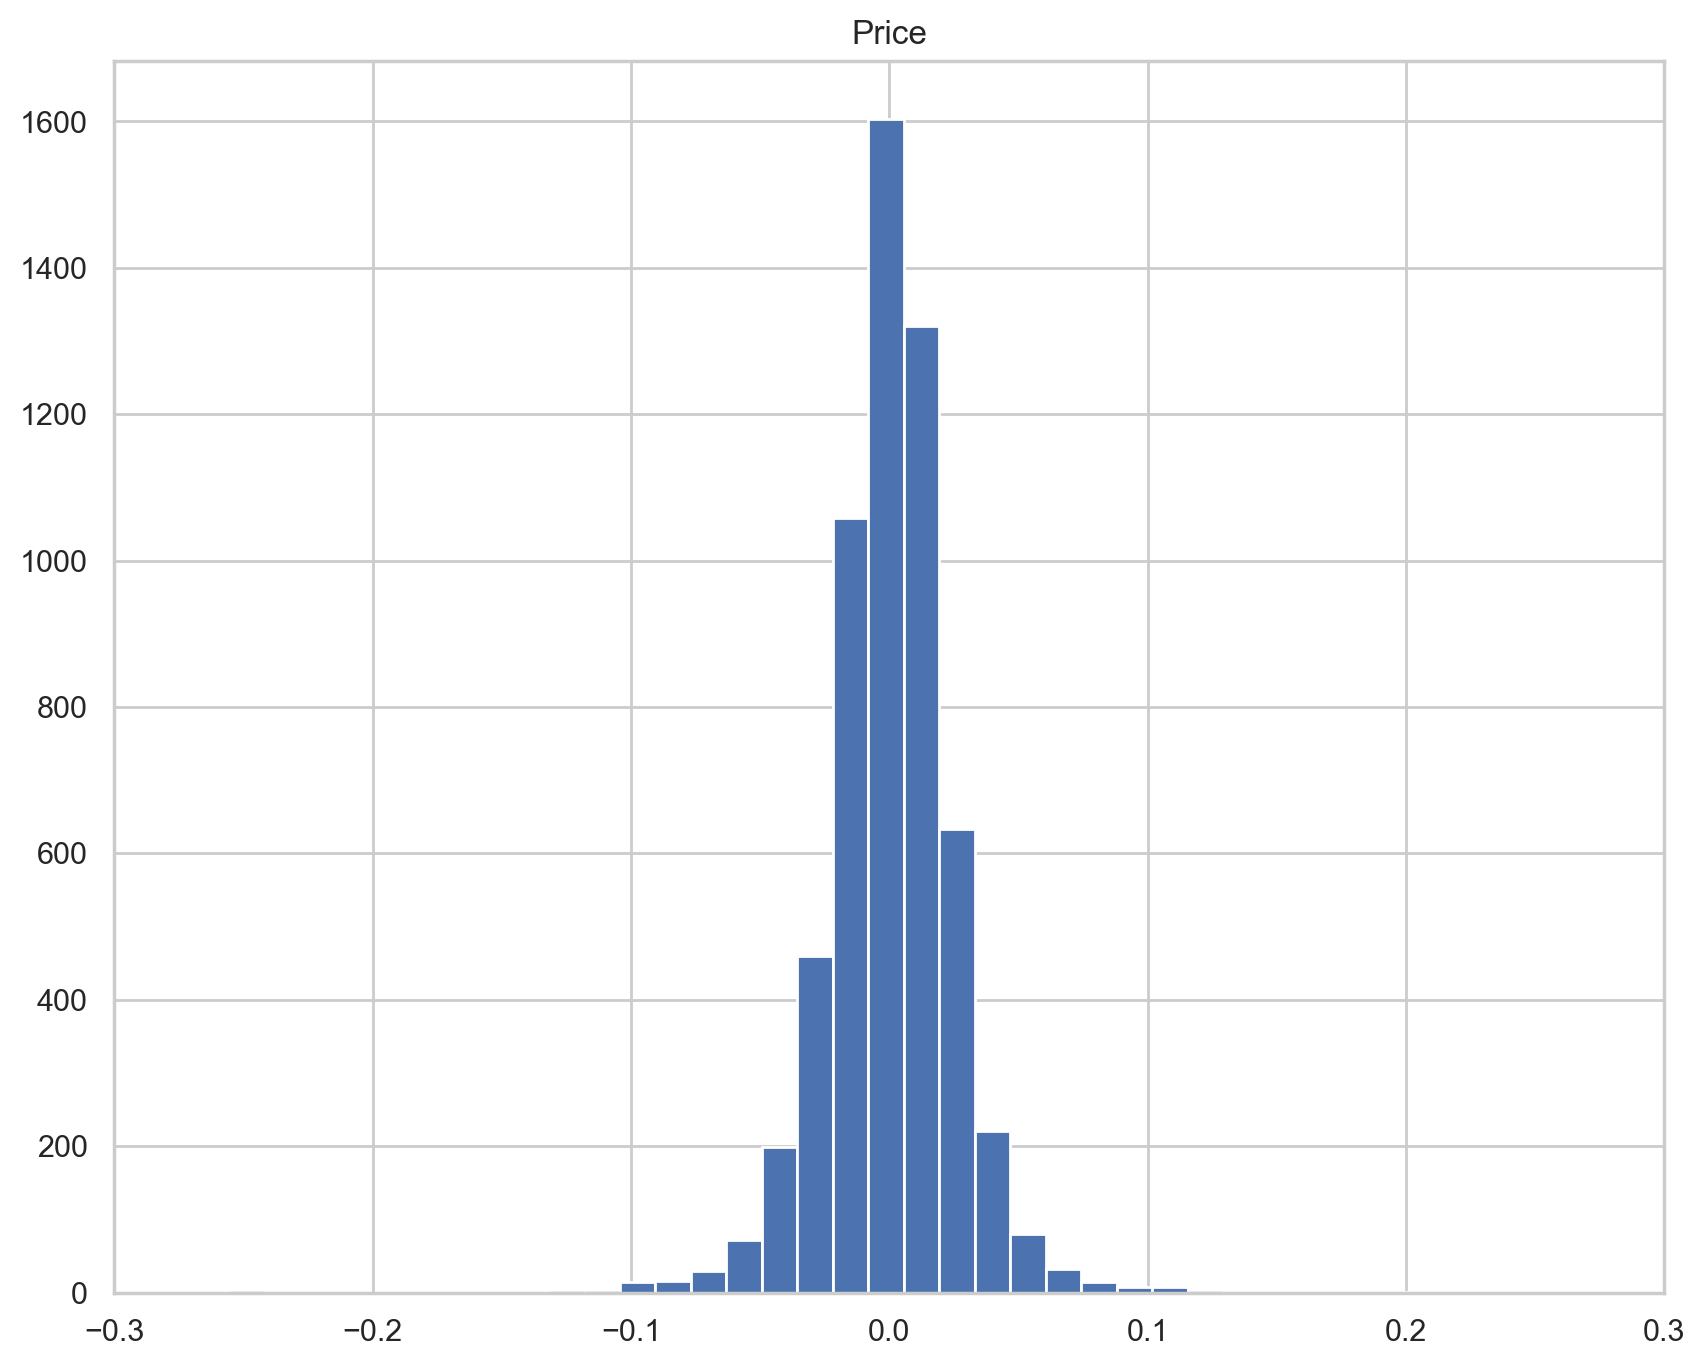

In [21]:
#pct_oil=oil['Price'].pct_change()
pct_change.hist(bins=250)
plt.xlim([-0.3,0.3])

In [22]:
# Adding week, months and year columns to the dataframe
oil['Month'] = oil.index.month
oil['Year'] = oil.index.year

In [23]:
oil

,Price,Month,Year
Date,,,
2001-01-02,27.200001,1,2001
2001-01-03,27.950001,1,2001
2001-01-04,28.200001,1,2001
2001-01-05,28.000000,1,2001
2001-01-08,27.350000,1,2001
...,...,...,...
2024-01-25,77.360001,1,2024
2024-01-26,78.010002,1,2024
2024-01-29,76.779999,1,2024


In [24]:
oil.dtypes

Price    float64
Month      int64
Year       int64
dtype: object

In [25]:
print(oil.groupby('Month')['Price'].mean())

Month
1     61.225708
2     61.798863
3     63.844841
4     64.971011
5     66.164435
6     67.169959
7     67.775155
8     66.616928
9     66.287752
10    65.180474
11    63.693312
12    61.411913
Name: Price, dtype: float64


In [26]:
print(oil.groupby('Year')['Price'].mean())

Year
2001    25.960405
2002    26.150440
2003    30.994400
2004    41.469076
2005    56.704502
2006    66.254560
2007    72.364524
2008    99.751541
2009    62.094088
2010    79.609881
2011    95.114405
2012    94.213520
2013    98.046825
2014    92.906786
2015    48.761349
2016    43.435800
2017    50.853267
2018    64.947450
2019    57.041825
2020    39.344269
2021    68.106032
2022    94.331474
2023    77.592152
2024    73.860952
Name: Price, dtype: float64


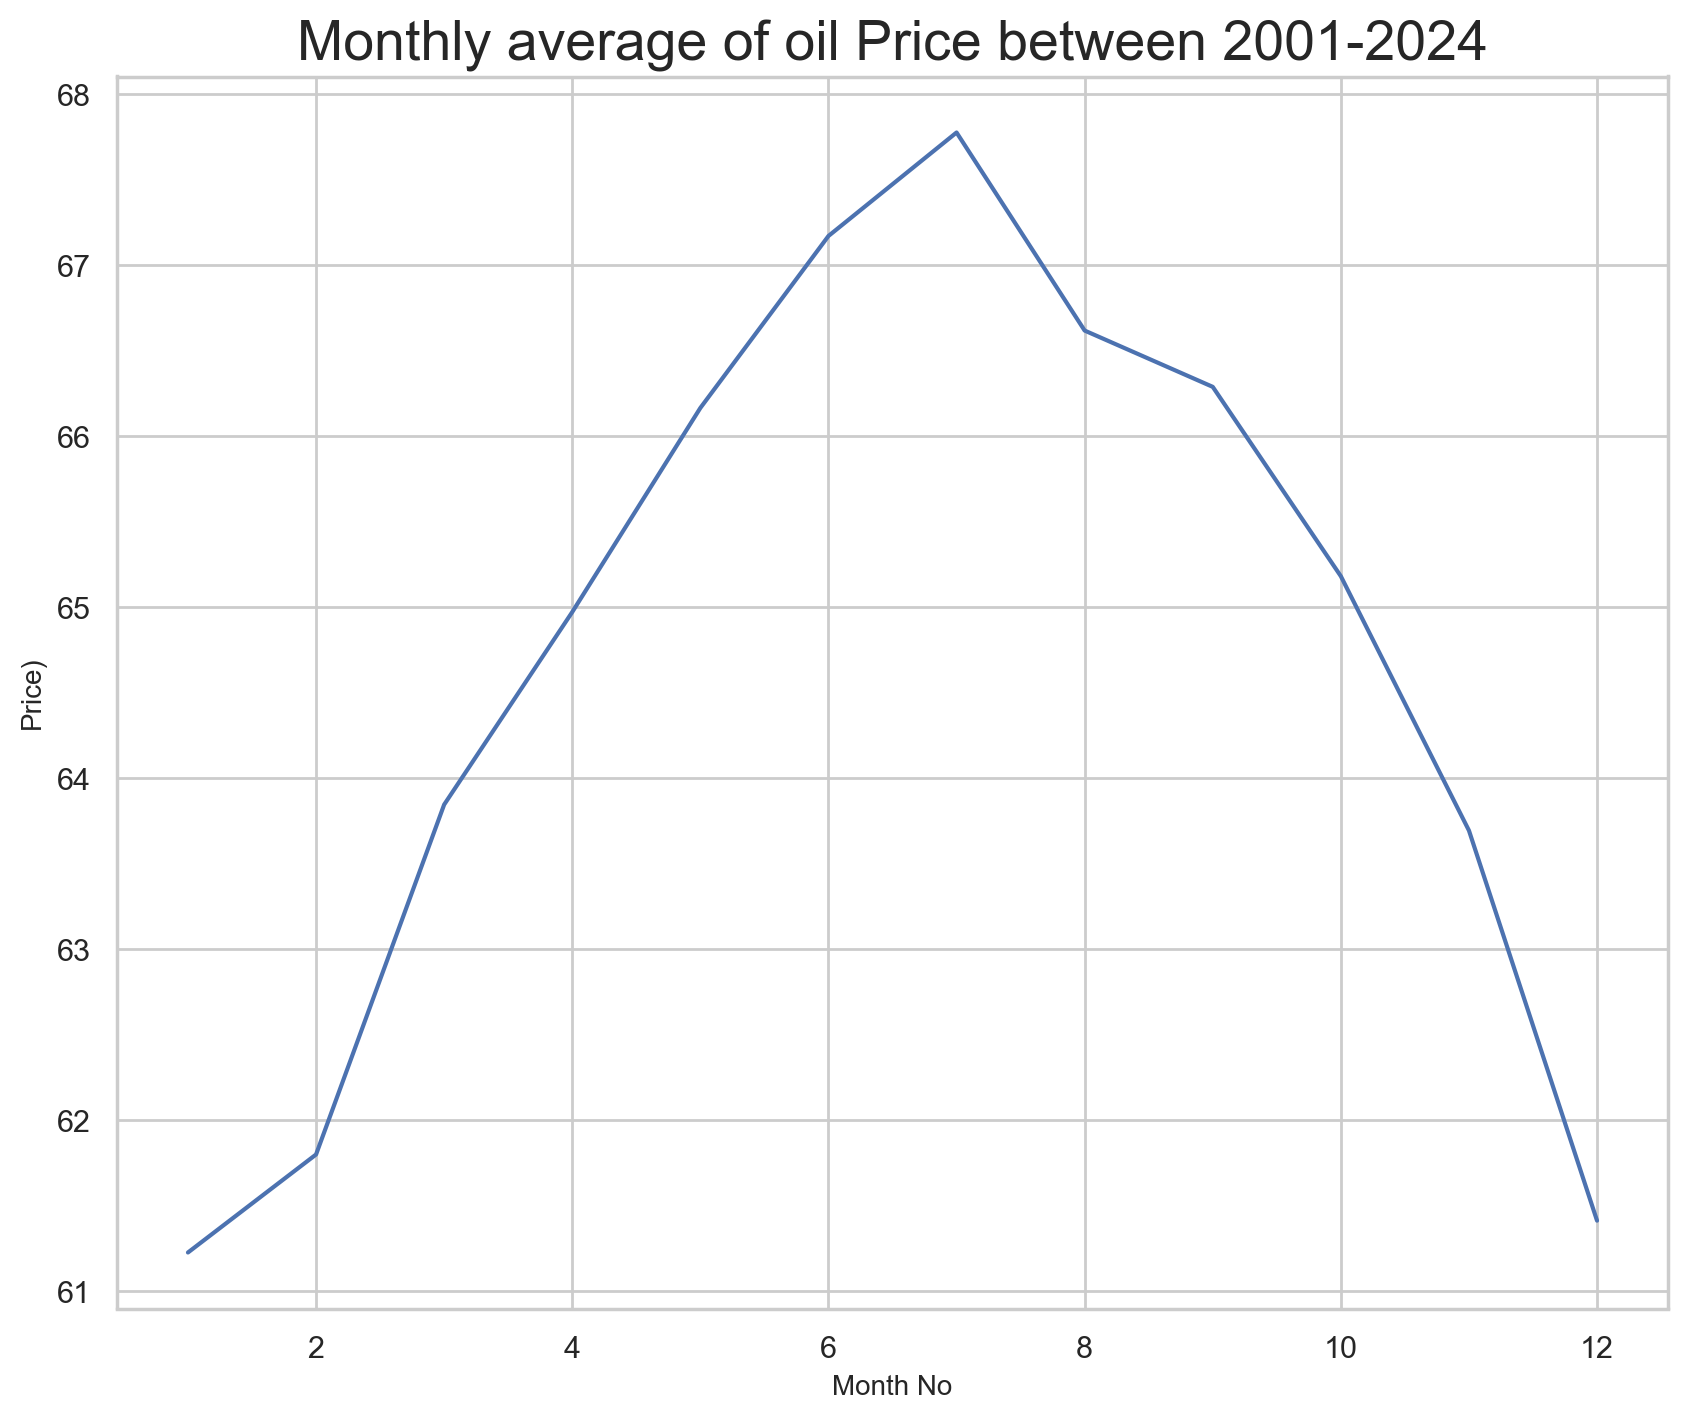

In [27]:
# Grouping by Months and plotting the mean
plt.plot(oil.groupby('Month')['Price'].mean())
plt.title("Monthly average of oil Price between 2001-2024",fontsize=20)
plt.xlabel("Month No", fontsize=10)
plt.ylabel("Price)",fontsize=10)
plt.savefig('monthly_avg.png')

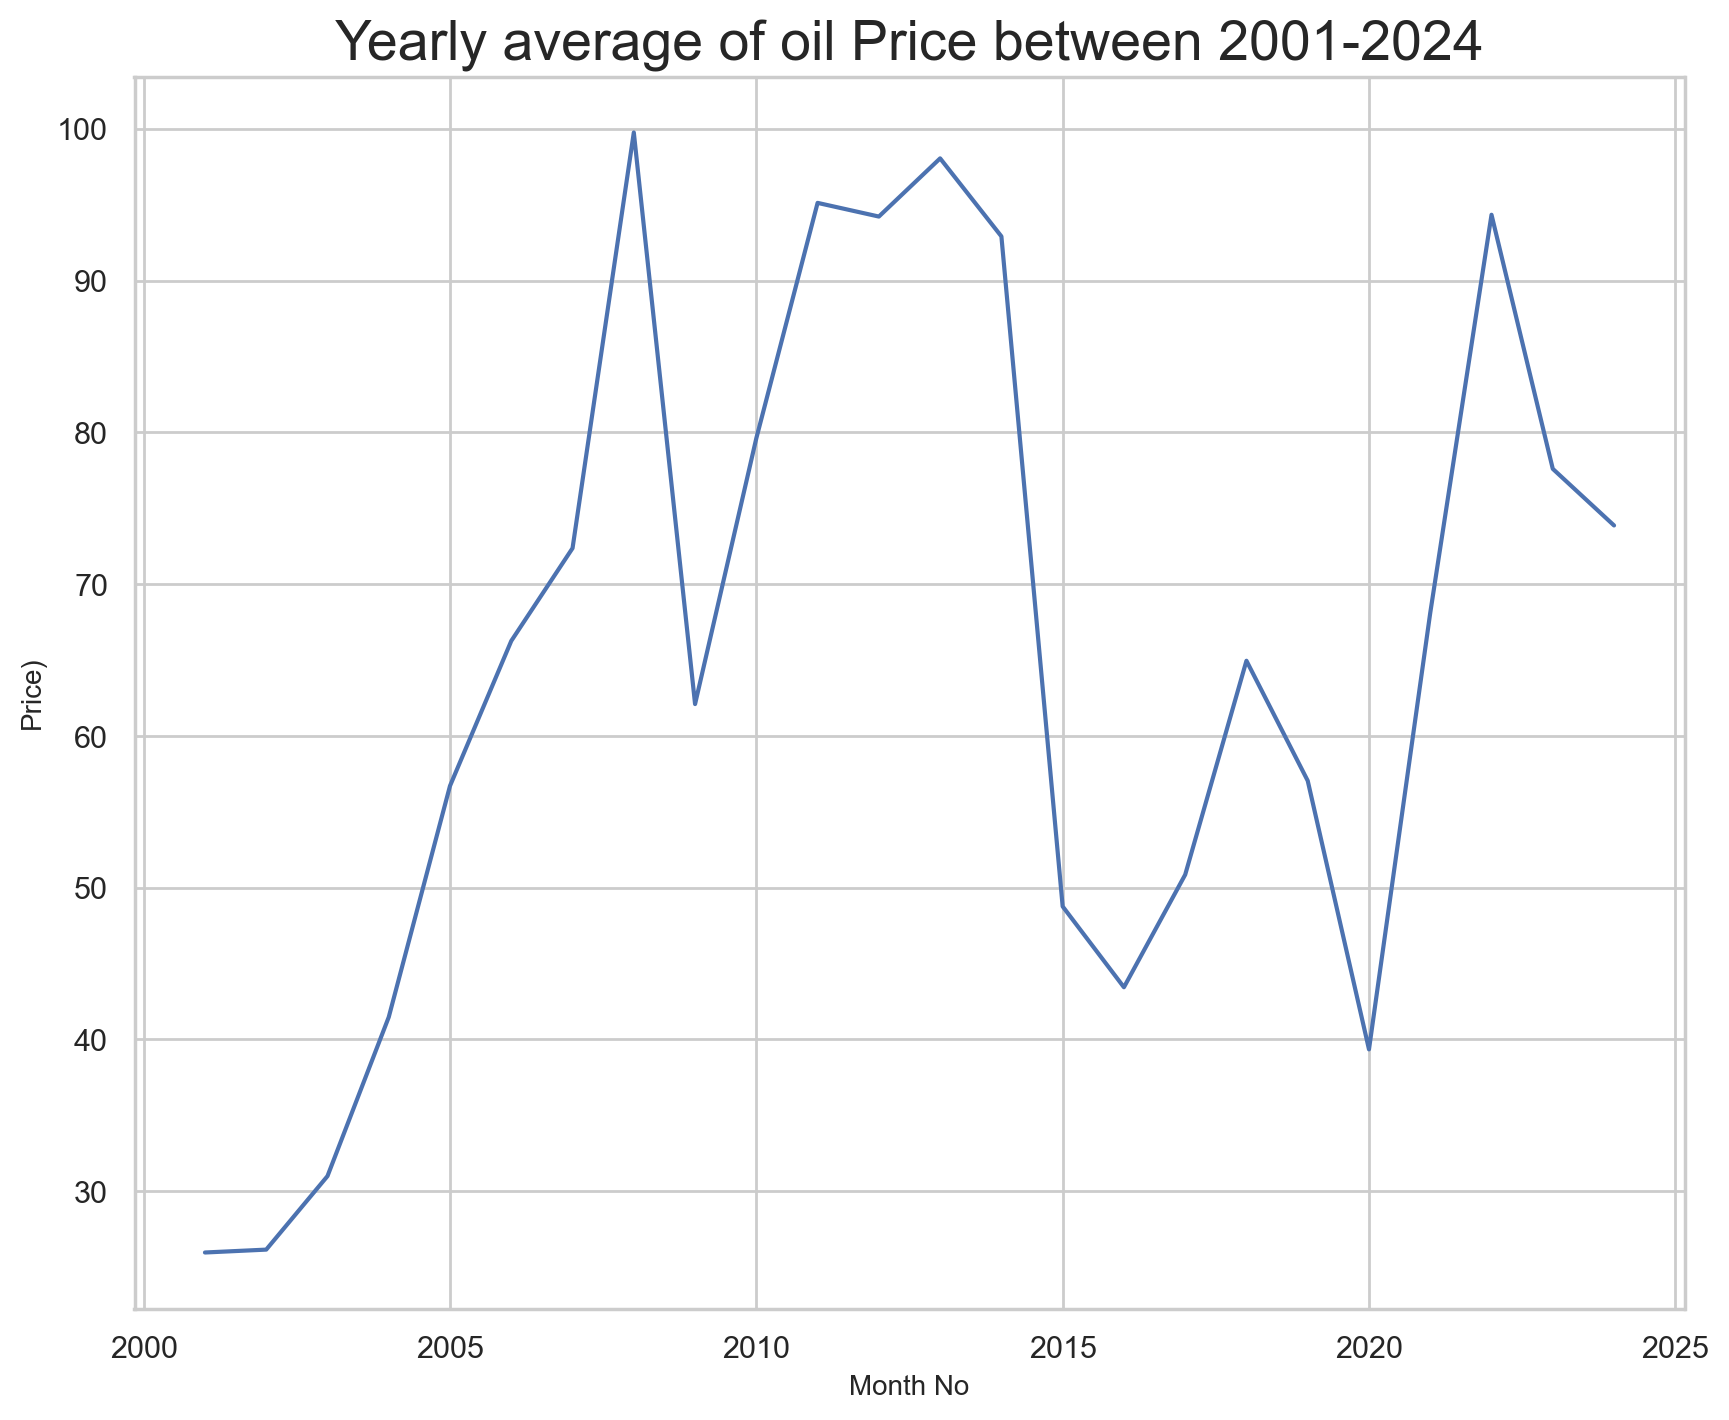

In [28]:
# Grouping by Years and plotting the mean
plt.plot(oil.groupby('Year')['Price'].mean())
plt.title("Yearly average of oil Price between 2001-2024",fontsize=20)
plt.xlabel("Month No", fontsize=10)
plt.ylabel("Price)",fontsize=10)
plt.savefig('Yearly_avg.png')

<Axes: ylabel='Price'>

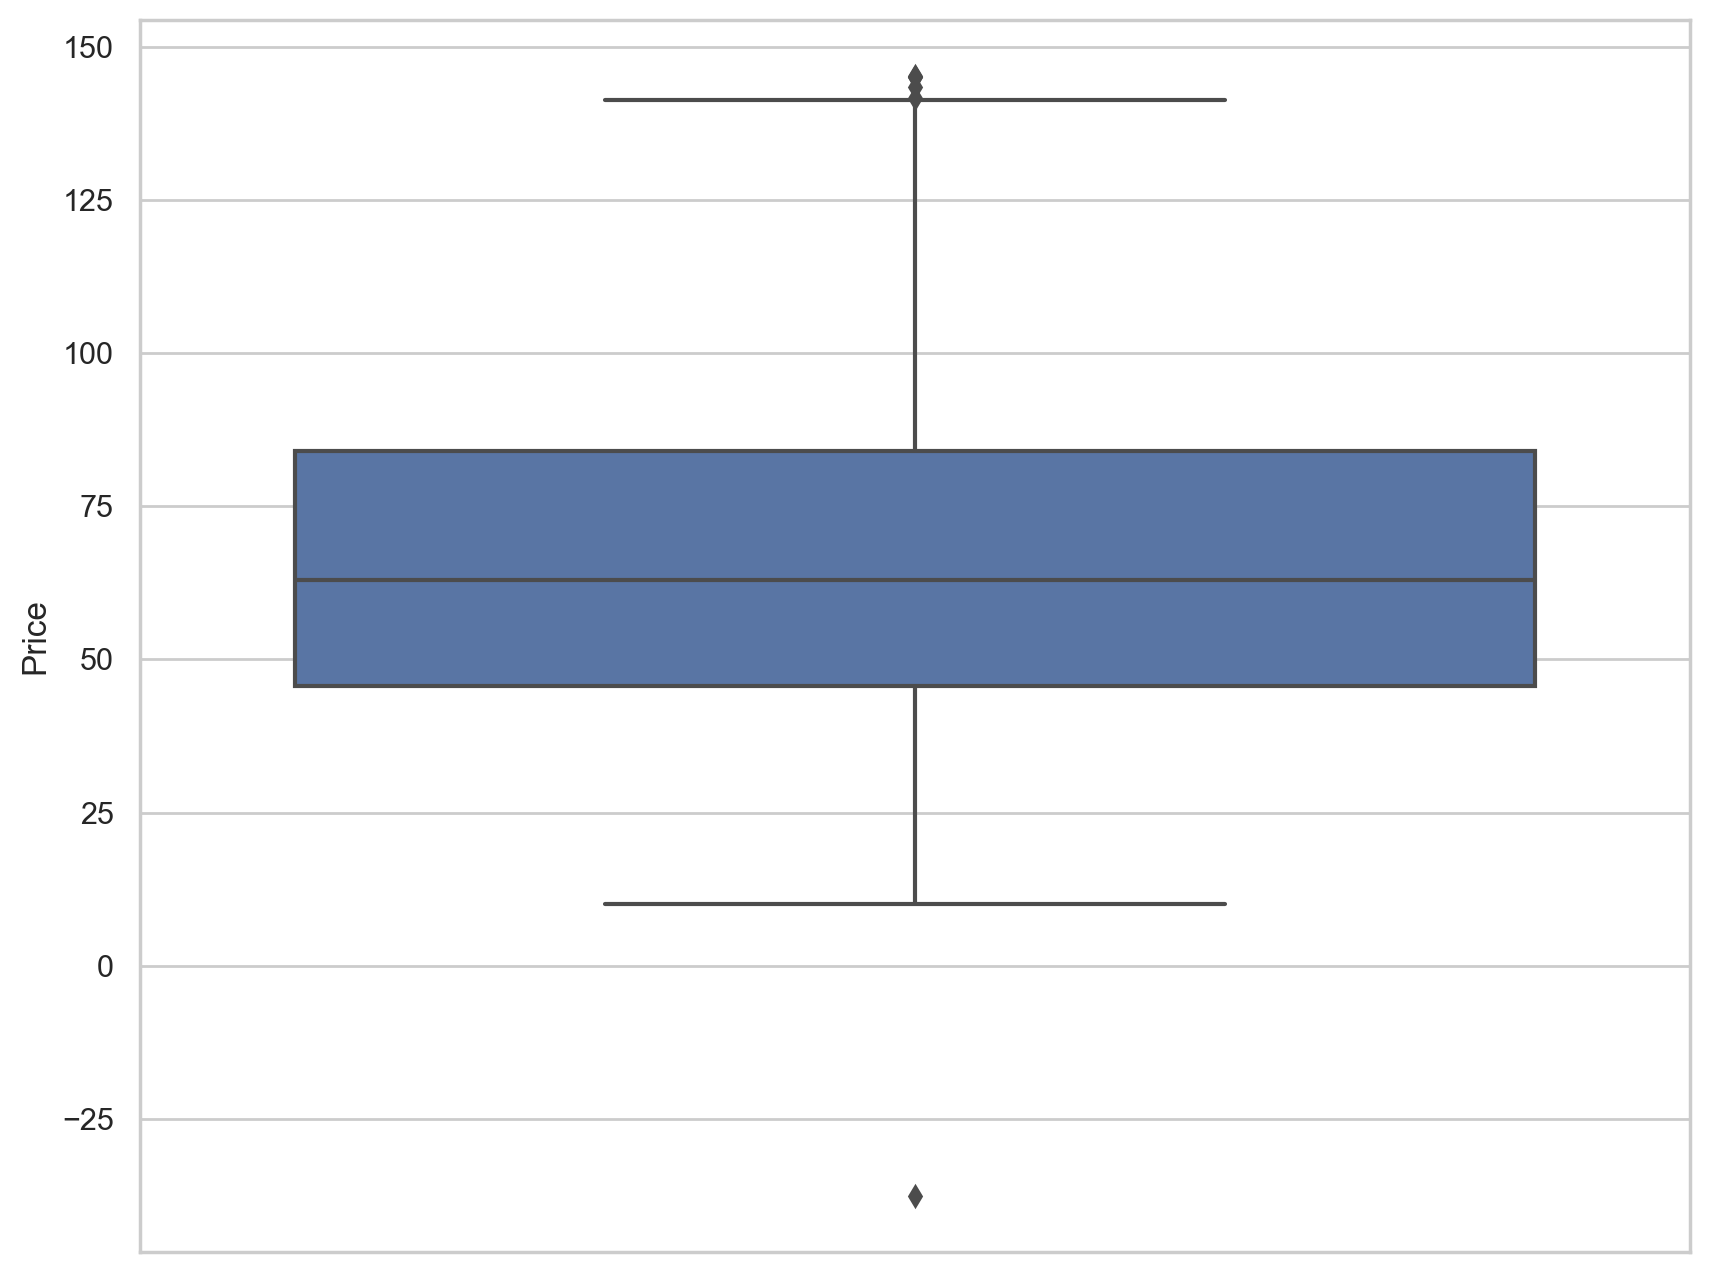

In [29]:
# Boxplot
sns.boxplot(y=oil['Price'])

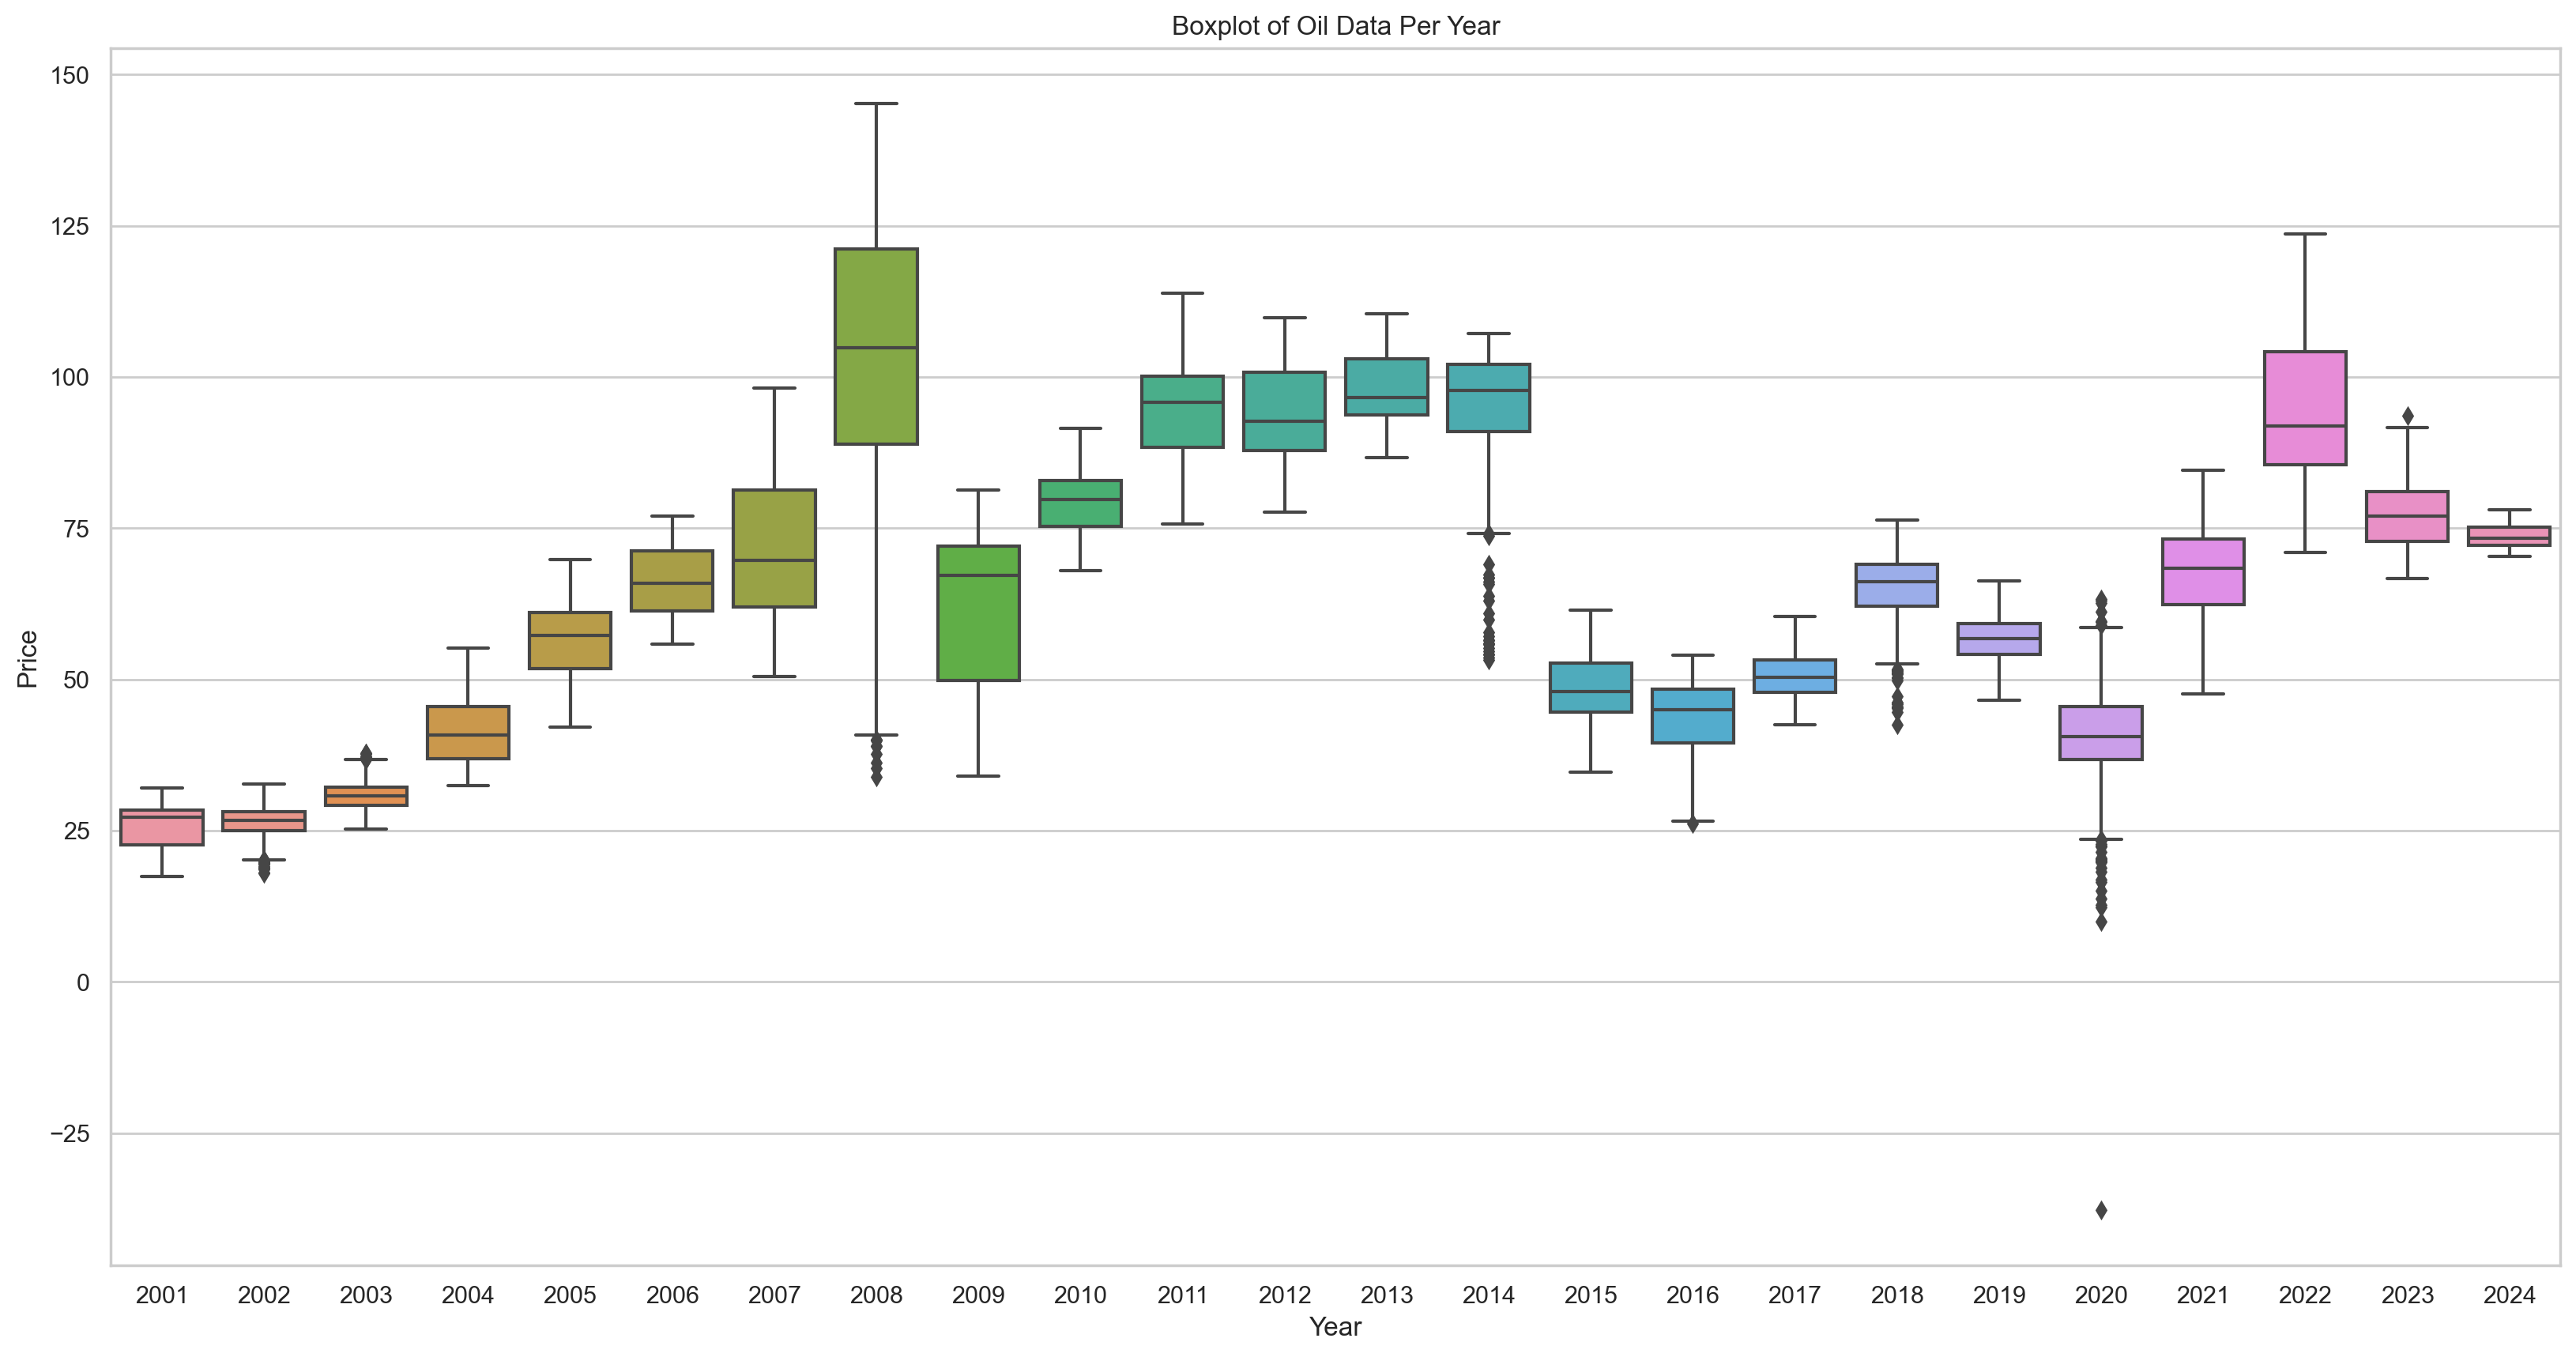

In [30]:
# Boxplot for Crude Price by Year
plt.figure(figsize=(20,10))
sns.boxplot(x='Year',y='Price',data=oil)
plt.title('Boxplot of Oil Data Per Year')
plt.savefig('box_year.png')

In [31]:
# Ad-fuller test to check the stationarity of the signal
result = adfuller(oil['Price'])
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values : ')
for key,value in result[4].items():
    print('\t%s : %.3f' %(key,value))
ans_oil = 'stationary' if result[1] < 0.05 else 'not stationary'

print(ans_oil)

ADF Statistic : -2.784421
p-value : 0.060534
Critical Values : 
	1% : -3.431
	5% : -2.862
	10% : -2.567
not stationary


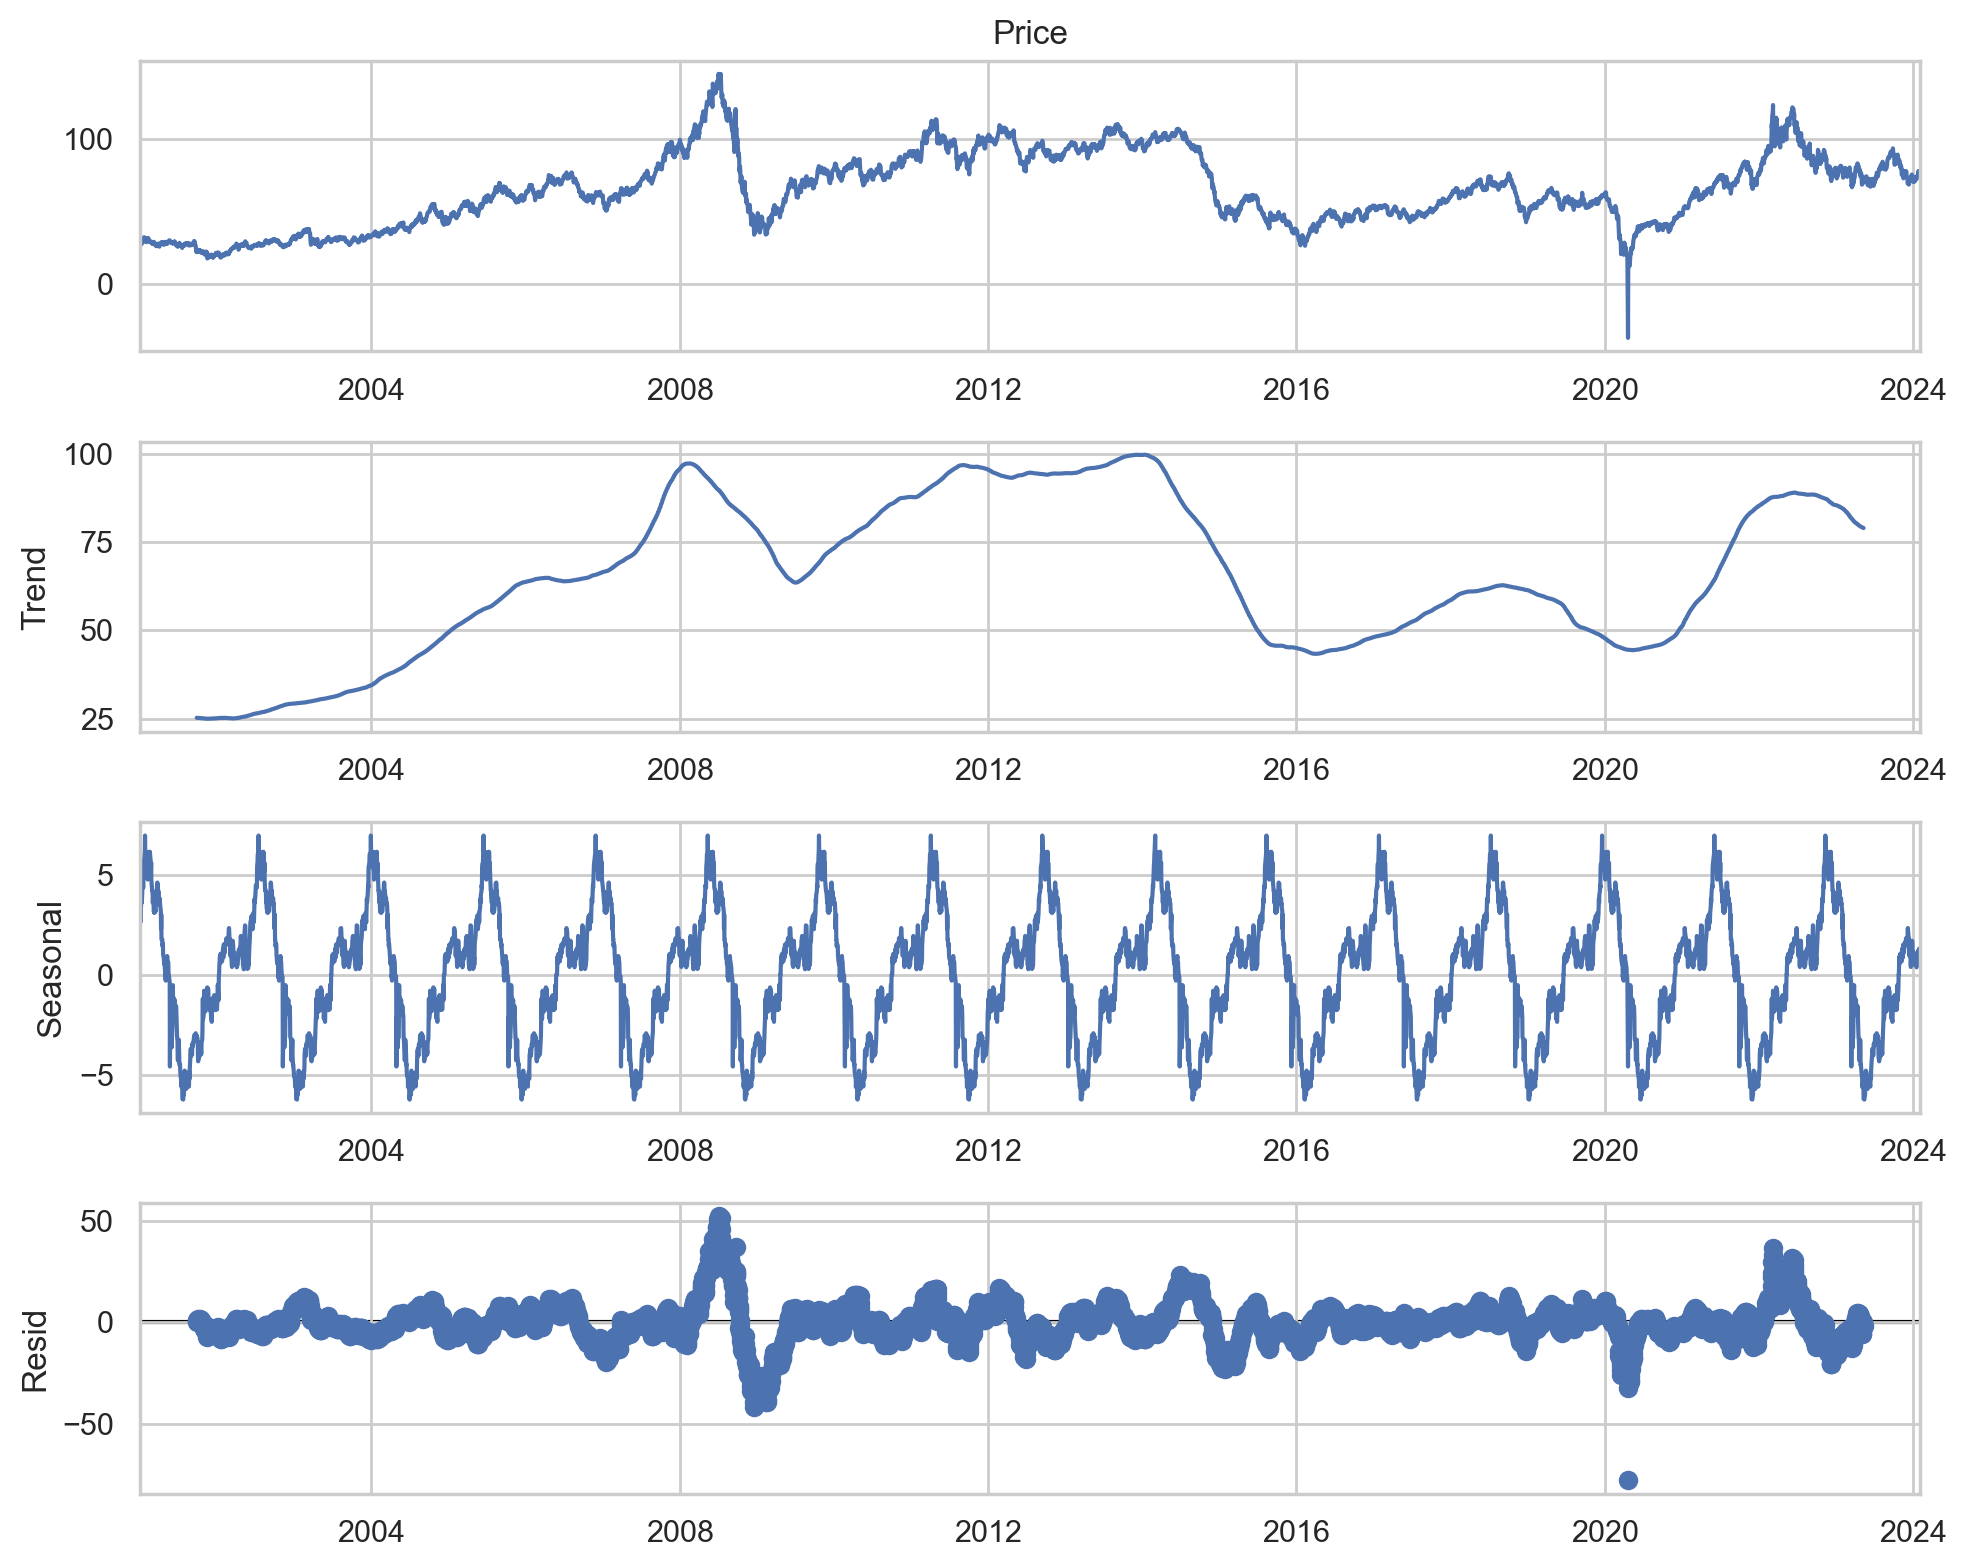

In [32]:
# Seasonal decomposition plot
sea_decom=seasonal_decompose(oil['Price'],model='additive',period=365)
sea_decom.plot()
plt.savefig('Seasonal_Decompose.png')

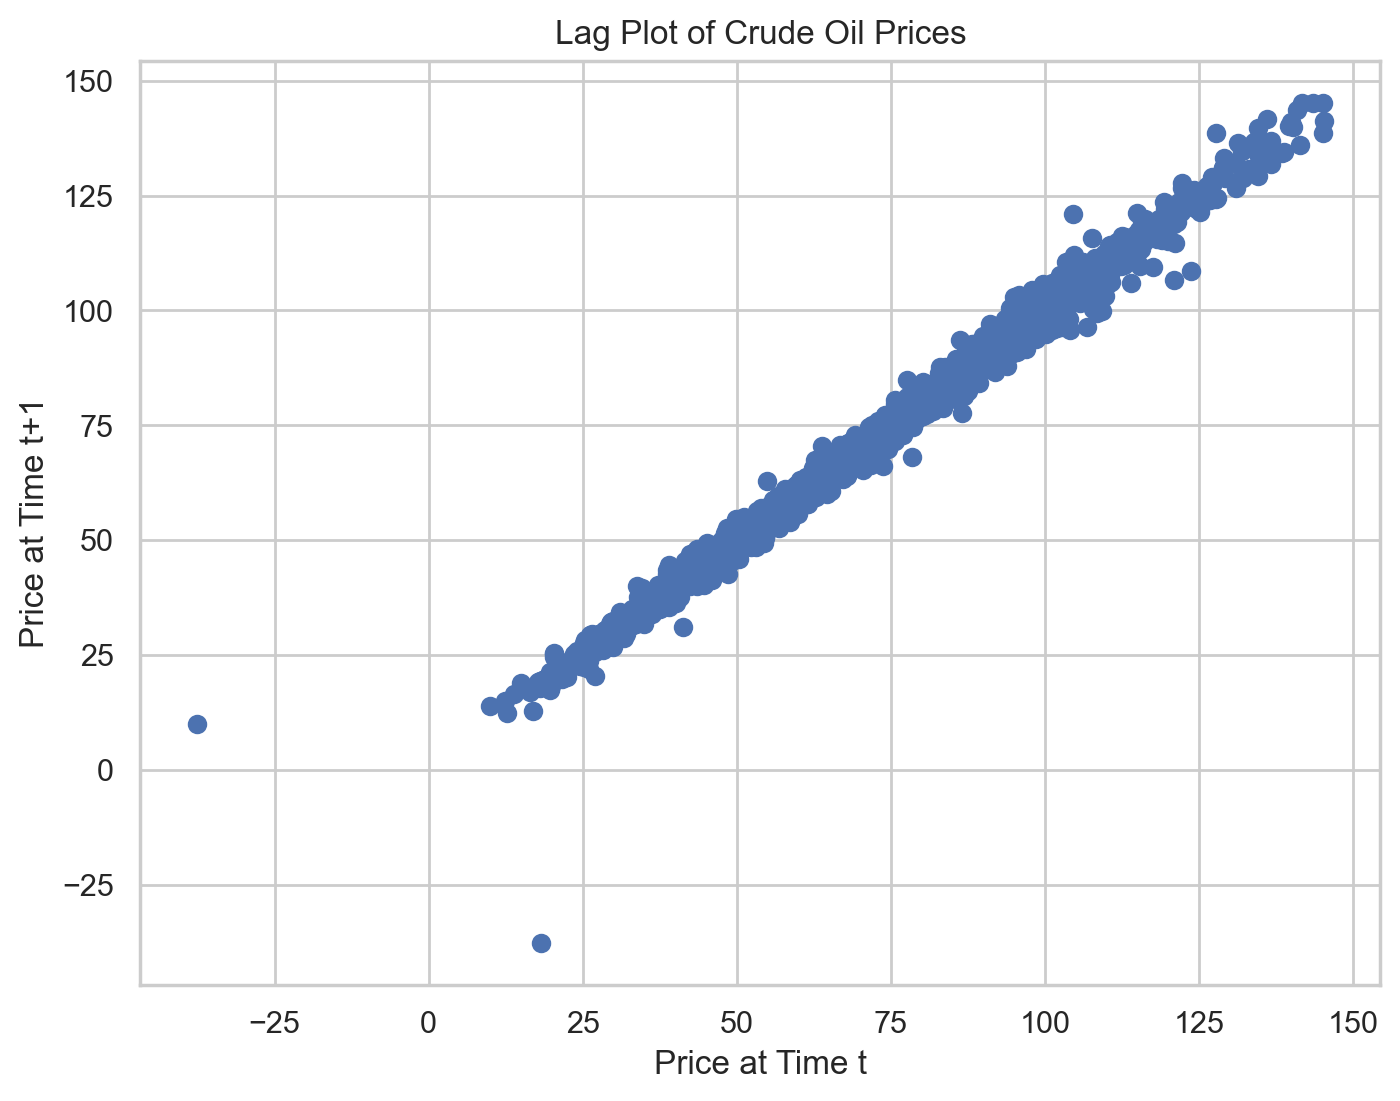

In [33]:
# lag plot
plt.figure(figsize=(8, 6))
lag_plot(oil['Price'], lag=1)
plt.title('Lag Plot of Crude Oil Prices')
plt.xlabel('Price at Time t')
plt.ylabel('Price at Time t+1')
plt.grid(True)
plt.savefig('Lagplot.png')

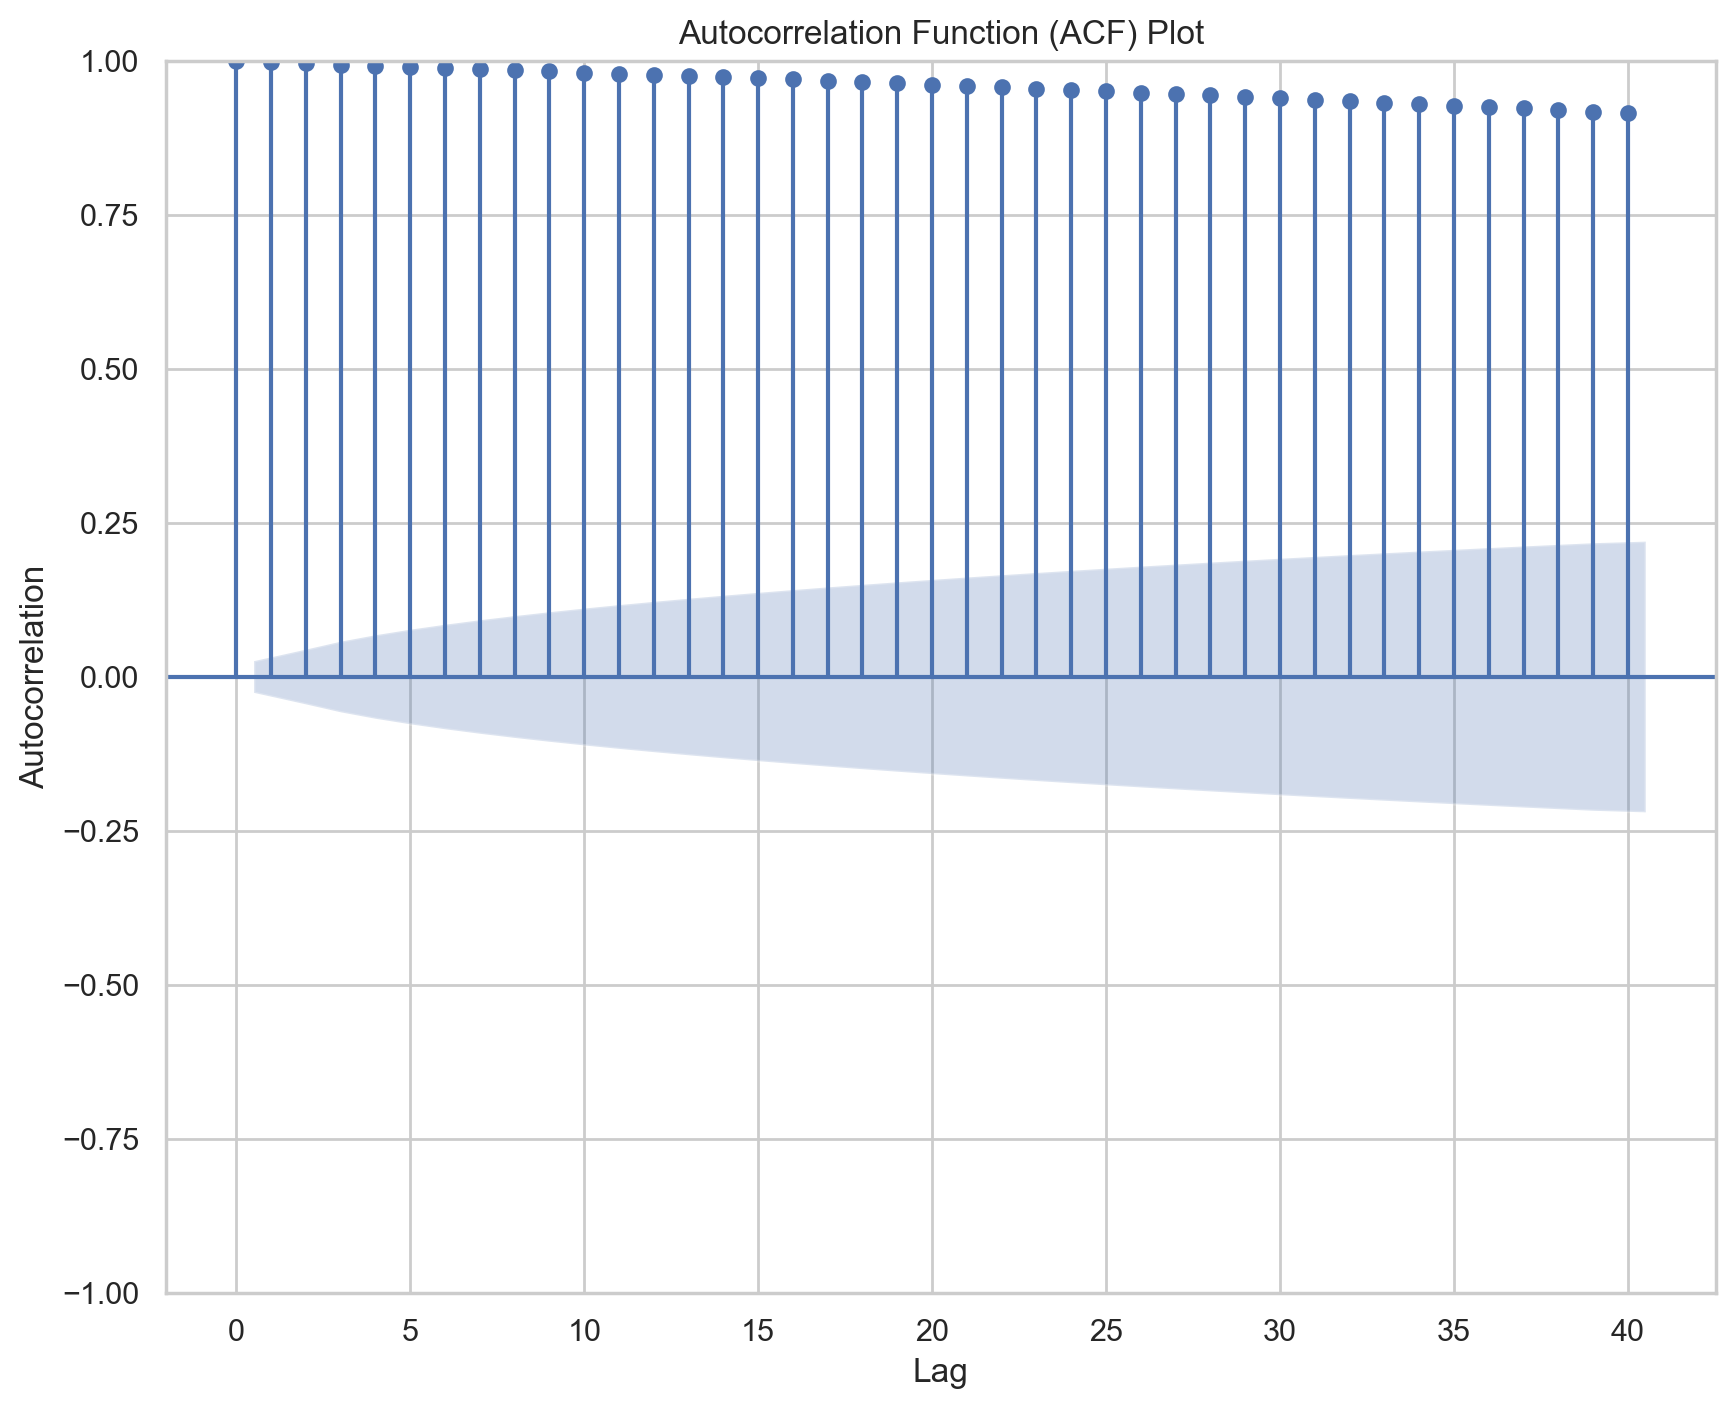

In [34]:
# Plot ACF to determine AR and MA process orders
plot_acf(oil['Price'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.savefig('acf_plot.png')

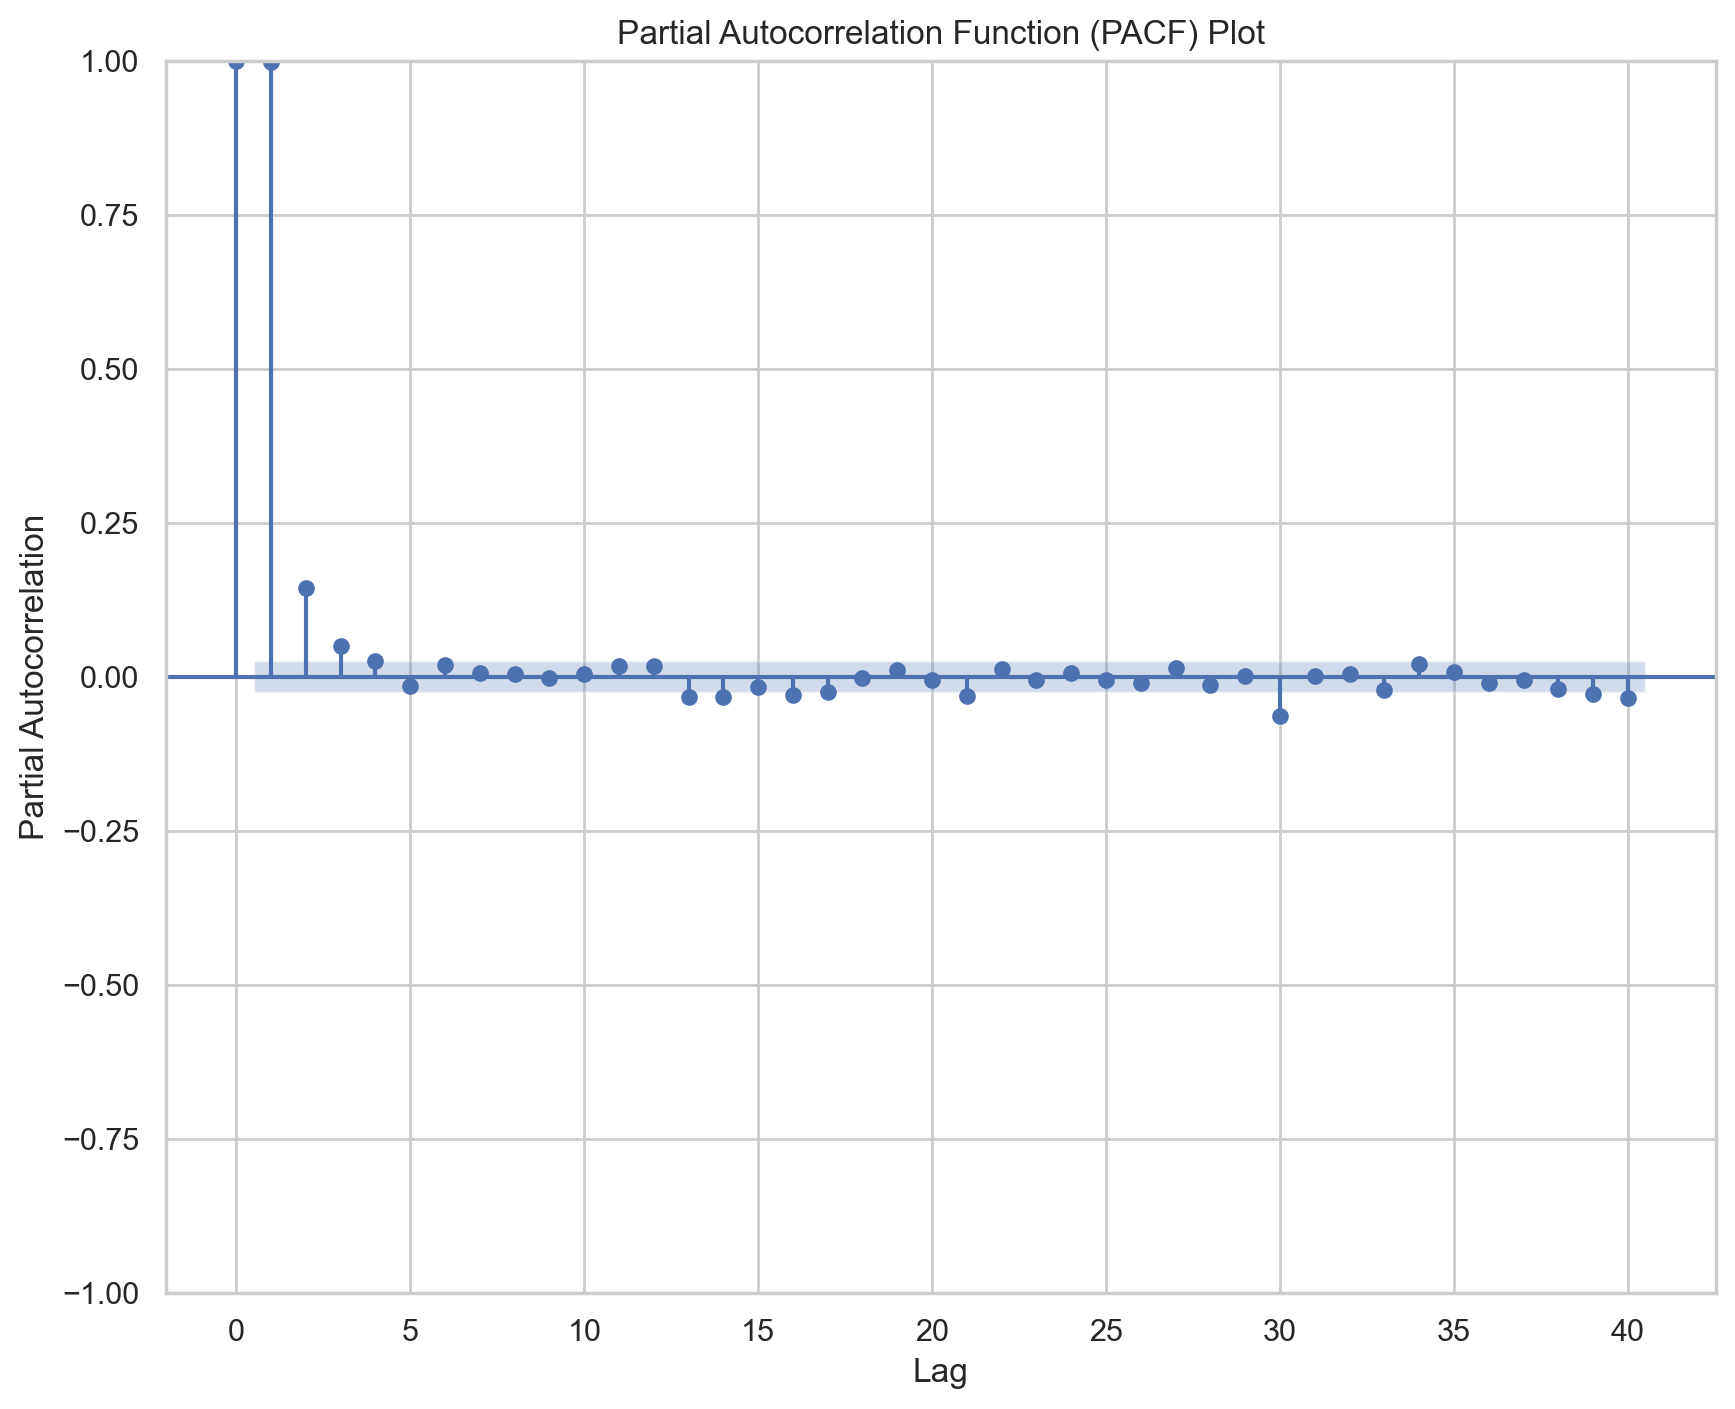

In [35]:
# Plot PACF to determine AR and MA process orders
plot_pacf(oil['Price'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.savefig('pacf_plot.png')

### We check stability and its plot after standardisation and other transformations

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
#standardizing features by removing the mean and scaling to unit variance
scaler=StandardScaler()

In [38]:
oil

,Price,Month,Year
Date,,,
2001-01-02,27.200001,1,2001
2001-01-03,27.950001,1,2001
2001-01-04,28.200001,1,2001
2001-01-05,28.000000,1,2001
2001-01-08,27.350000,1,2001
...,...,...,...
2024-01-25,77.360001,1,2024
2024-01-26,78.010002,1,2024
2024-01-29,76.779999,1,2024


In [39]:
#extract the values in the 'Price' column and reshape them into a single column.
price_data=oil["Price"].values.reshape(-1, 1)

In [40]:
#fits the scaler to the data and transforms the data in a single step and it return the standardized data.
scale=scaler.fit_transform(price_data)

In [41]:
scale

array([[-1.48216935],
       [-1.45253311],
       [-1.44265437],
       ...,
       [ 0.47698307],
       [ 0.51807868],
       [ 0.44023413]])

Text(0.5, 1.0, 'After Standardising Data')

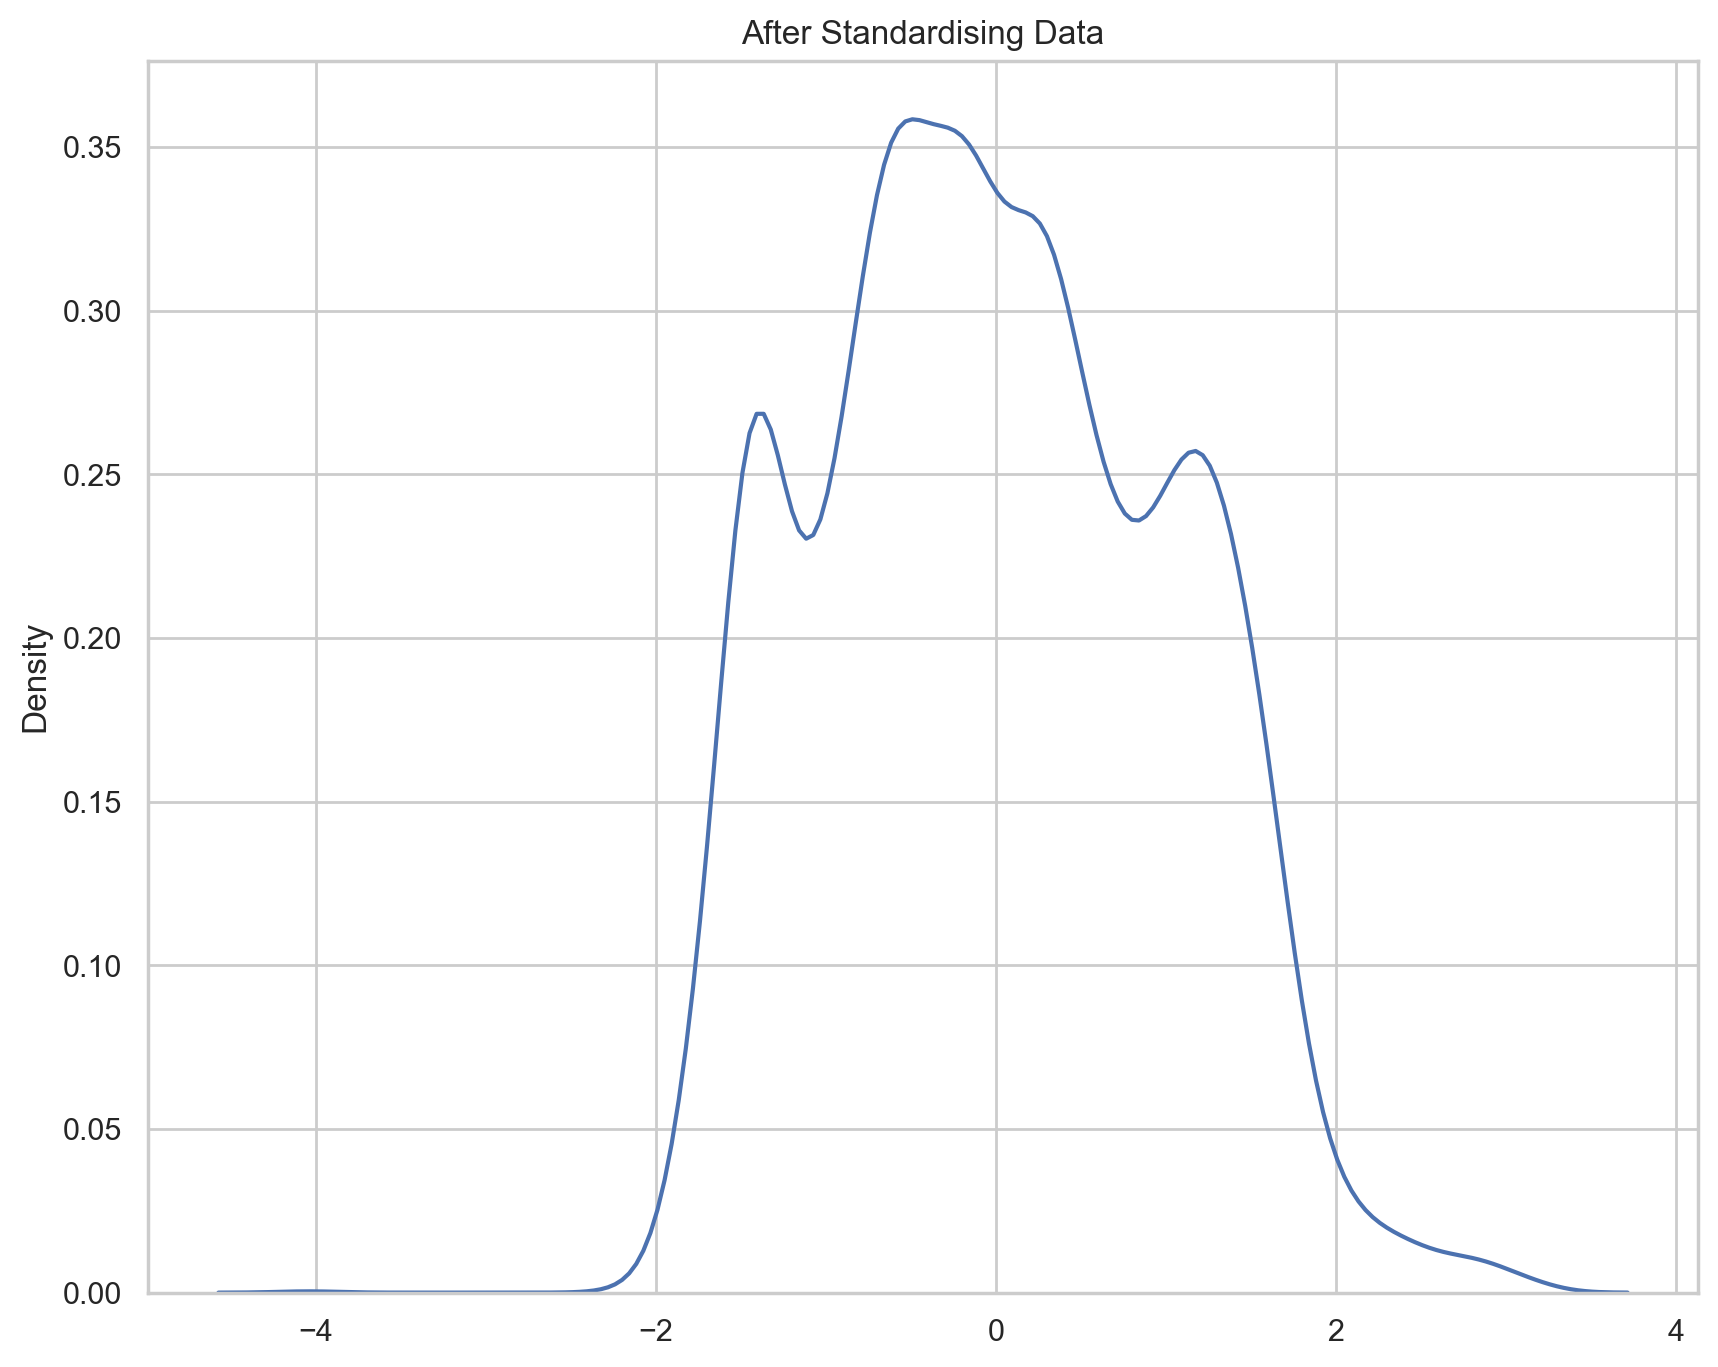

In [42]:
sns.kdeplot(data=scale.flatten())
plt.title("After Standardising Data")

Still skewness not reduced so we will go with log and other transformations

### LOG Transform

Let's make new dataframe for transform.

In [43]:
Transform=pd.DataFrame()

In [44]:
k=np.log(oil["Price"])

In [45]:
Transform["Log"]=k

In [46]:
Transform

,Log
Date,
2001-01-02,3.303217
2001-01-03,3.330417
2001-01-04,3.339322
2001-01-05,3.332205
2001-01-08,3.308717
...,...
2024-01-25,4.348470
2024-01-26,4.356837
2024-01-29,4.340944


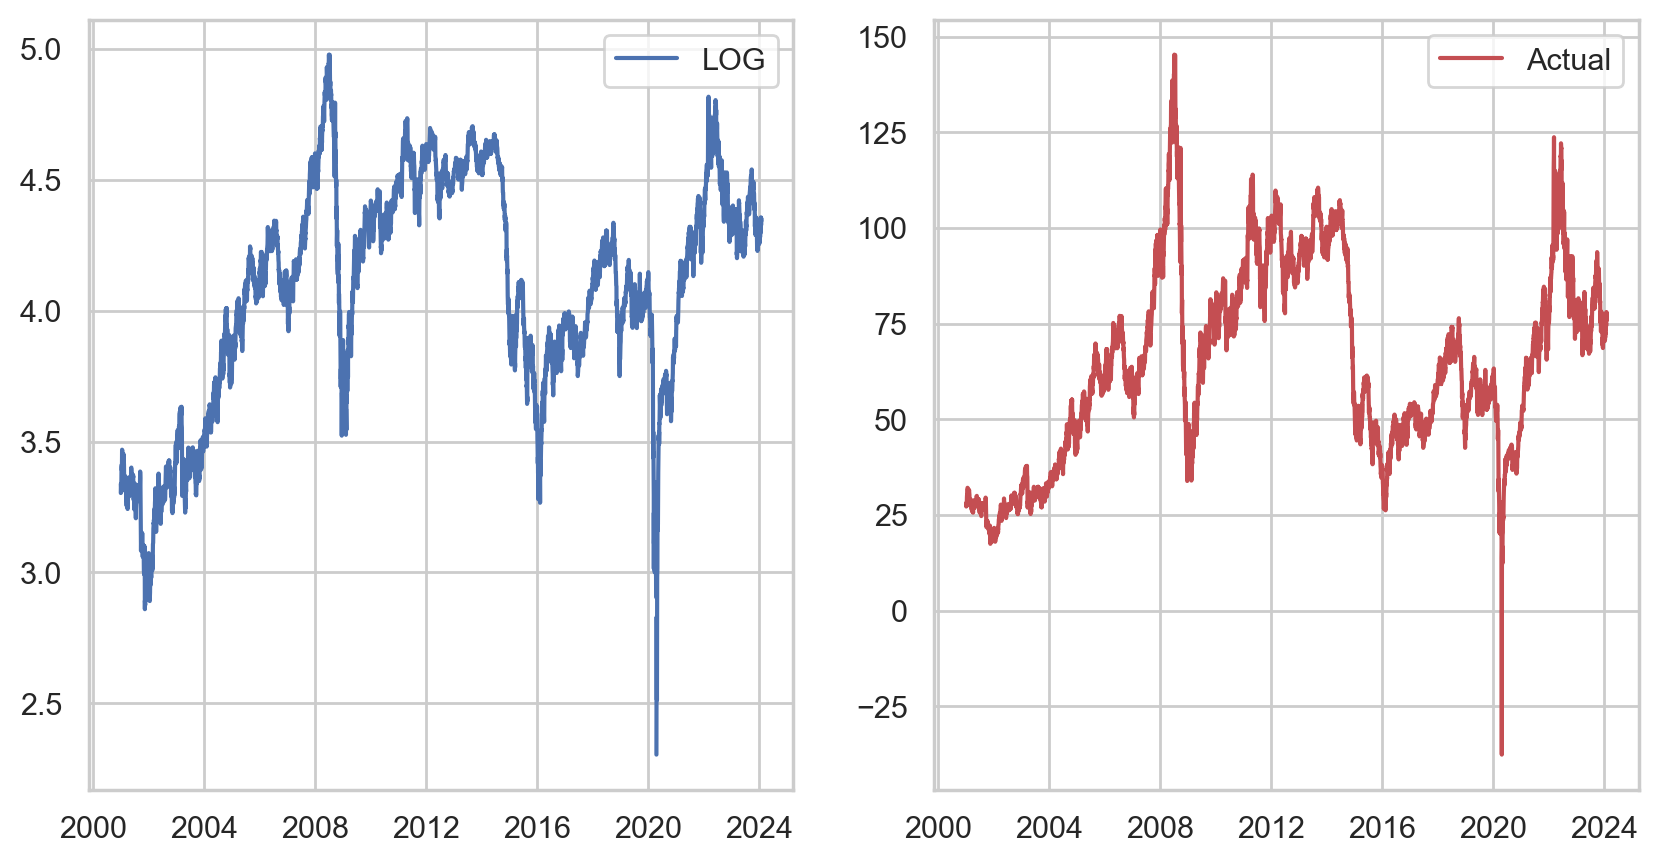

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(Transform["Log"],label="LOG")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(oil["Price"],label="Actual",c='r')
plt.legend(loc="best")

Data after Log Transformation and Actual Data

In [48]:
import statsmodels.api as sm
import pylab as py

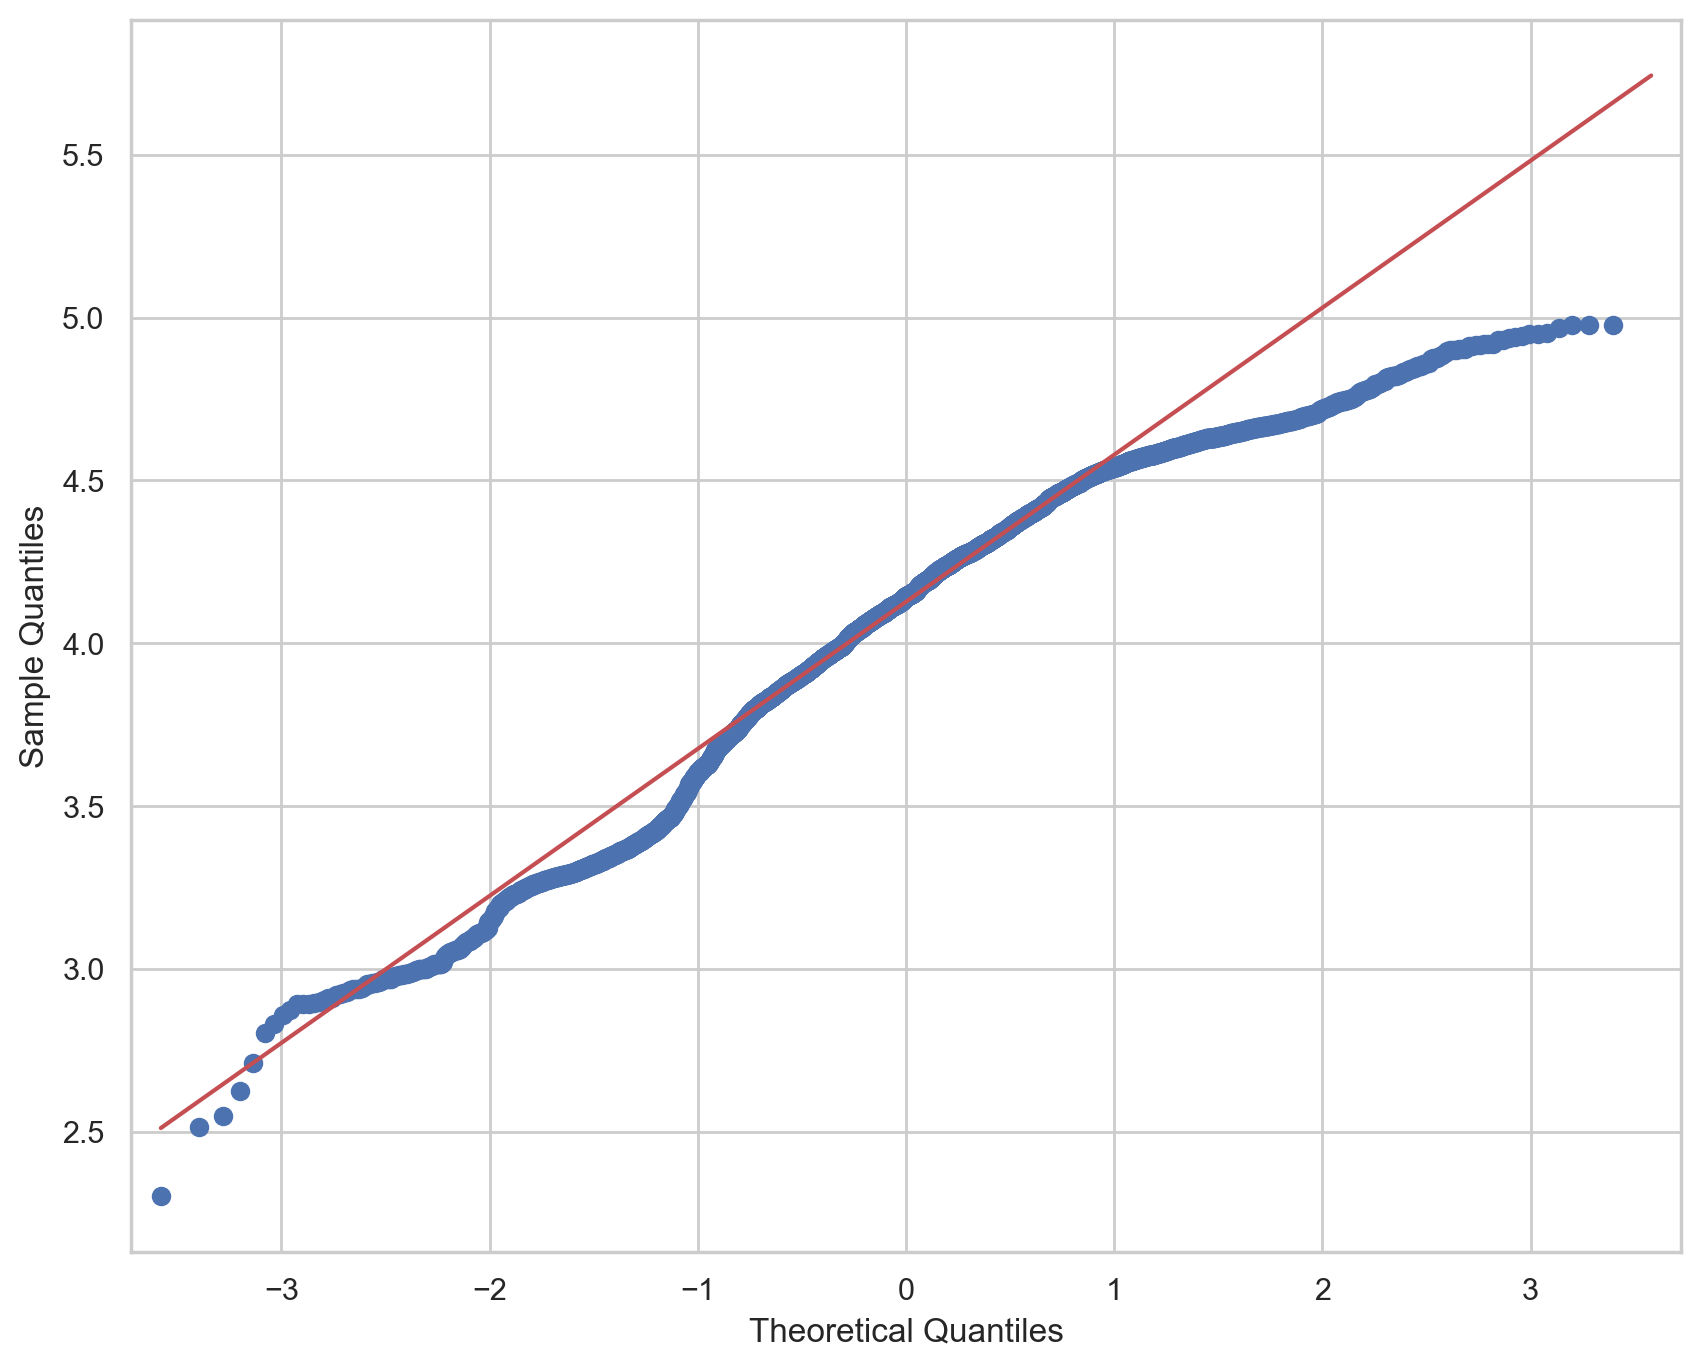

In [49]:
sm.qqplot(Transform["Log"],line='q')
py.show()

Text(0.5, 1.0, 'After log(ln) transformation')

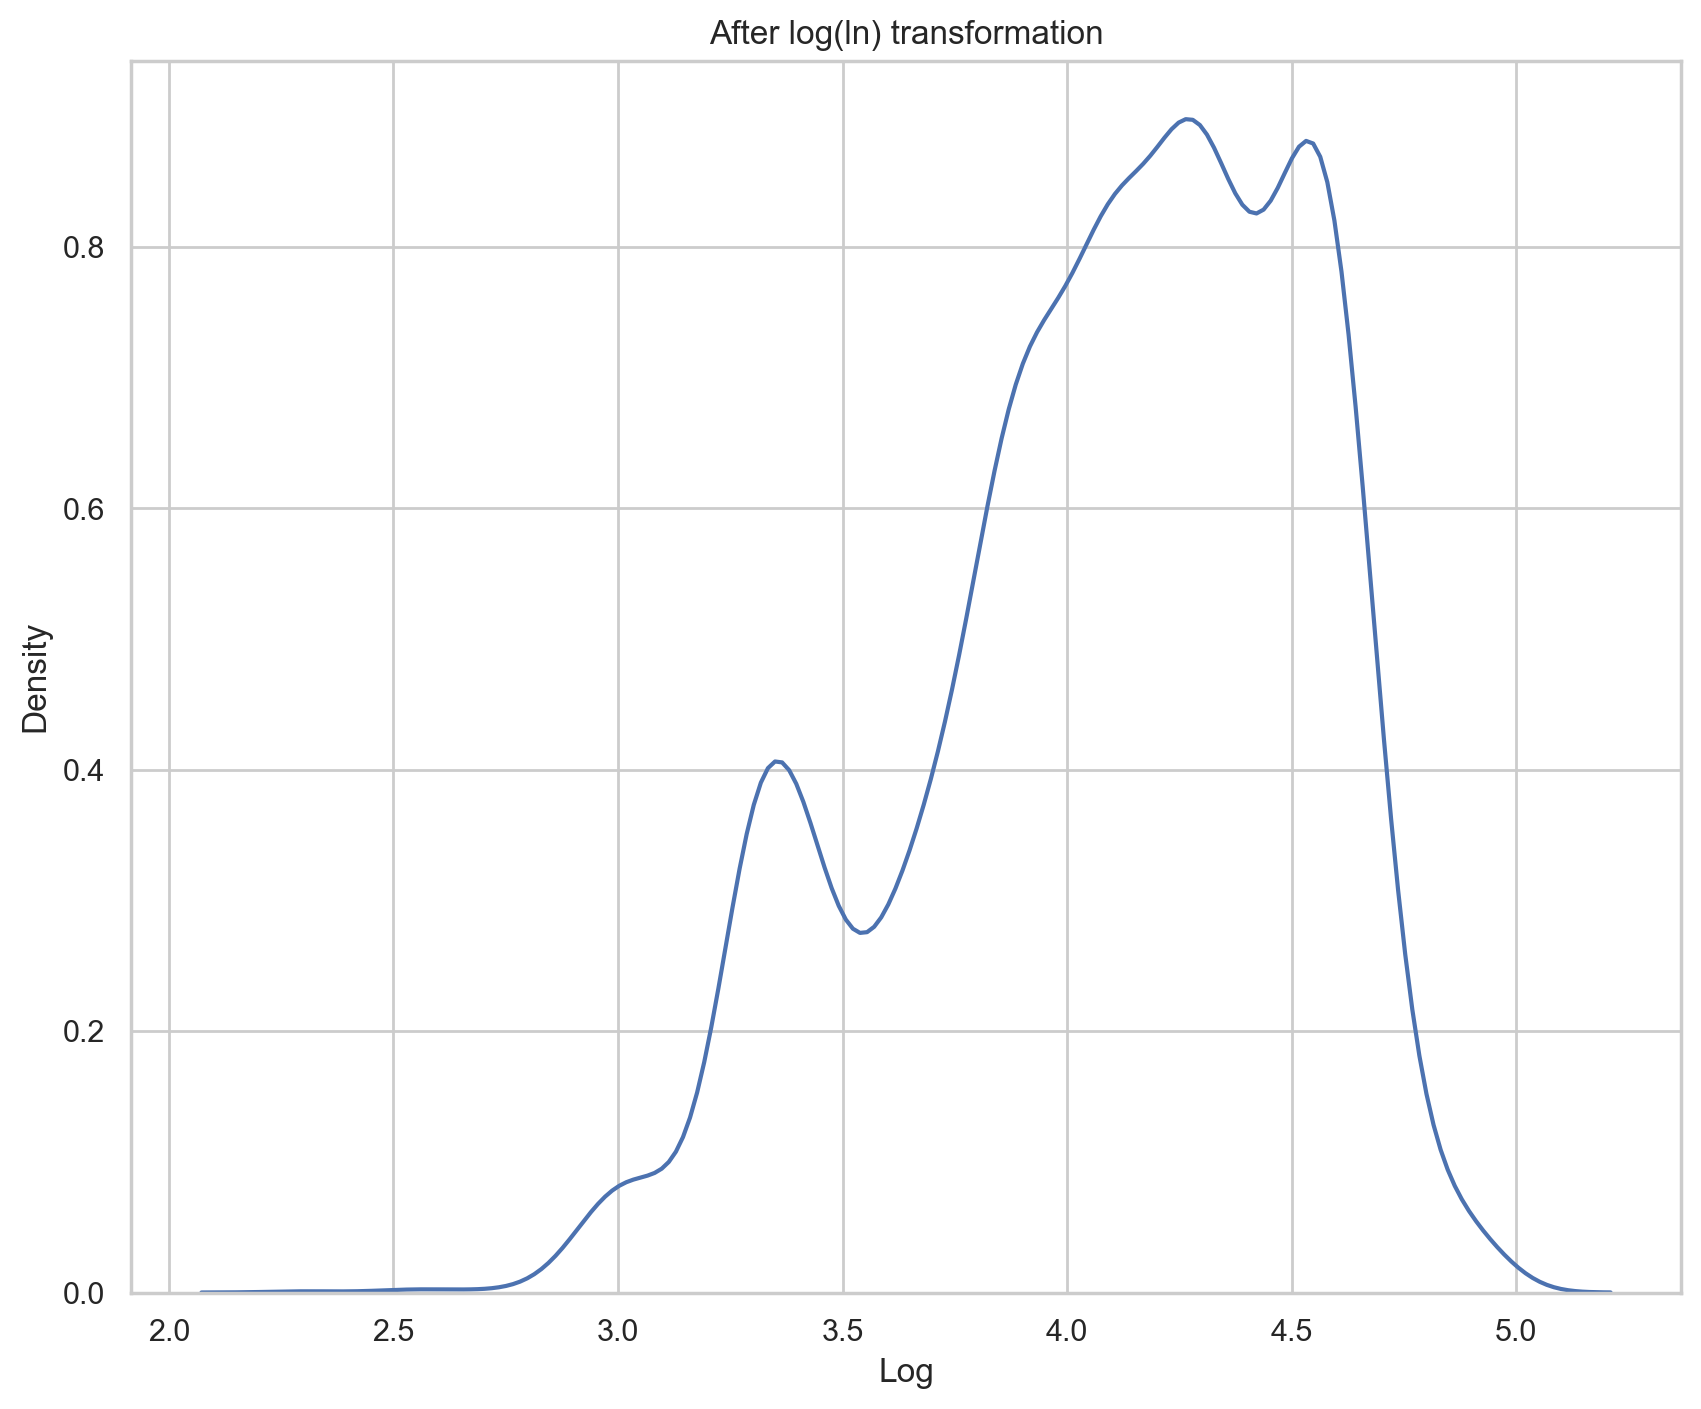

In [50]:
sns.kdeplot(data=Transform["Log"])
plt.title("After log(ln) transformation")

we see here skewness still not reduced and data is also not stable  and The fit is not much good so we decided to do differencing log transformation

### Differencing Log Transformations

In [51]:
#differences between consecutive values in the "Log" column of the Transform DataFrame, with any rows containing NaN values removed.
difLog=Transform["Log"]-Transform["Log"].shift()
difLog.dropna(inplace=True)

In [52]:
#Add the column logdif in transform
Transform["LOGDif"]=difLog

In [53]:
Transform["LOGDif"]


Date
2001-01-02         NaN
2001-01-03    0.027200
2001-01-04    0.008905
2001-01-05   -0.007117
2001-01-08   -0.023488
                ...   
2024-01-25    0.029783
2024-01-26    0.008367
2024-01-29   -0.015893
2024-01-30    0.013454
2024-01-31   -0.025641
Name: LOGDif, Length: 5796, dtype: float64

In [54]:
Transform

,Log,LOGDif
Date,,
2001-01-02,3.303217,NaN
2001-01-03,3.330417,0.027200
2001-01-04,3.339322,0.008905
2001-01-05,3.332205,-0.007117
2001-01-08,3.308717,-0.023488
...,...,...
2024-01-25,4.348470,0.029783
2024-01-26,4.356837,0.008367
2024-01-29,4.340944,-0.015893


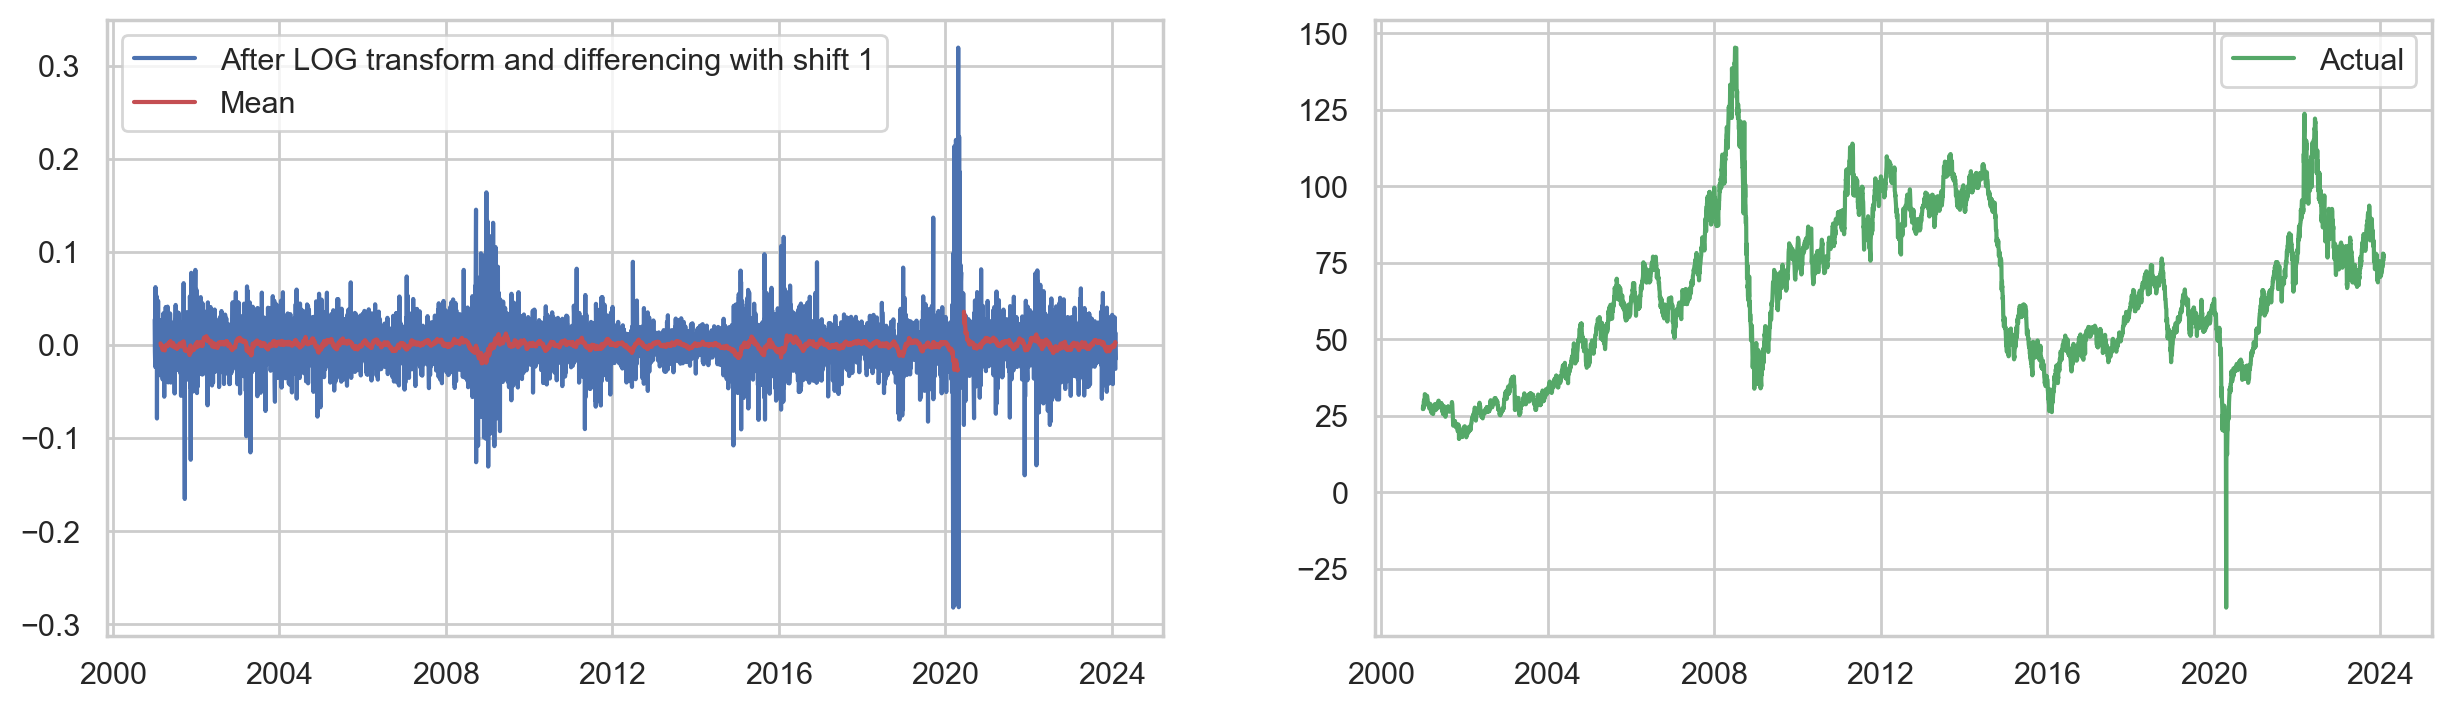

In [55]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(difLog,label="After LOG transform and differencing with shift 1")
plt.legend(loc="best")
rolling_mean=Transform["LOGDif"].rolling(window=36).mean()
plt.plot(rolling_mean,c='r',label="Mean")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(oil["Price"],label="Actual",c='g')
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'After LOG and Differencing it')

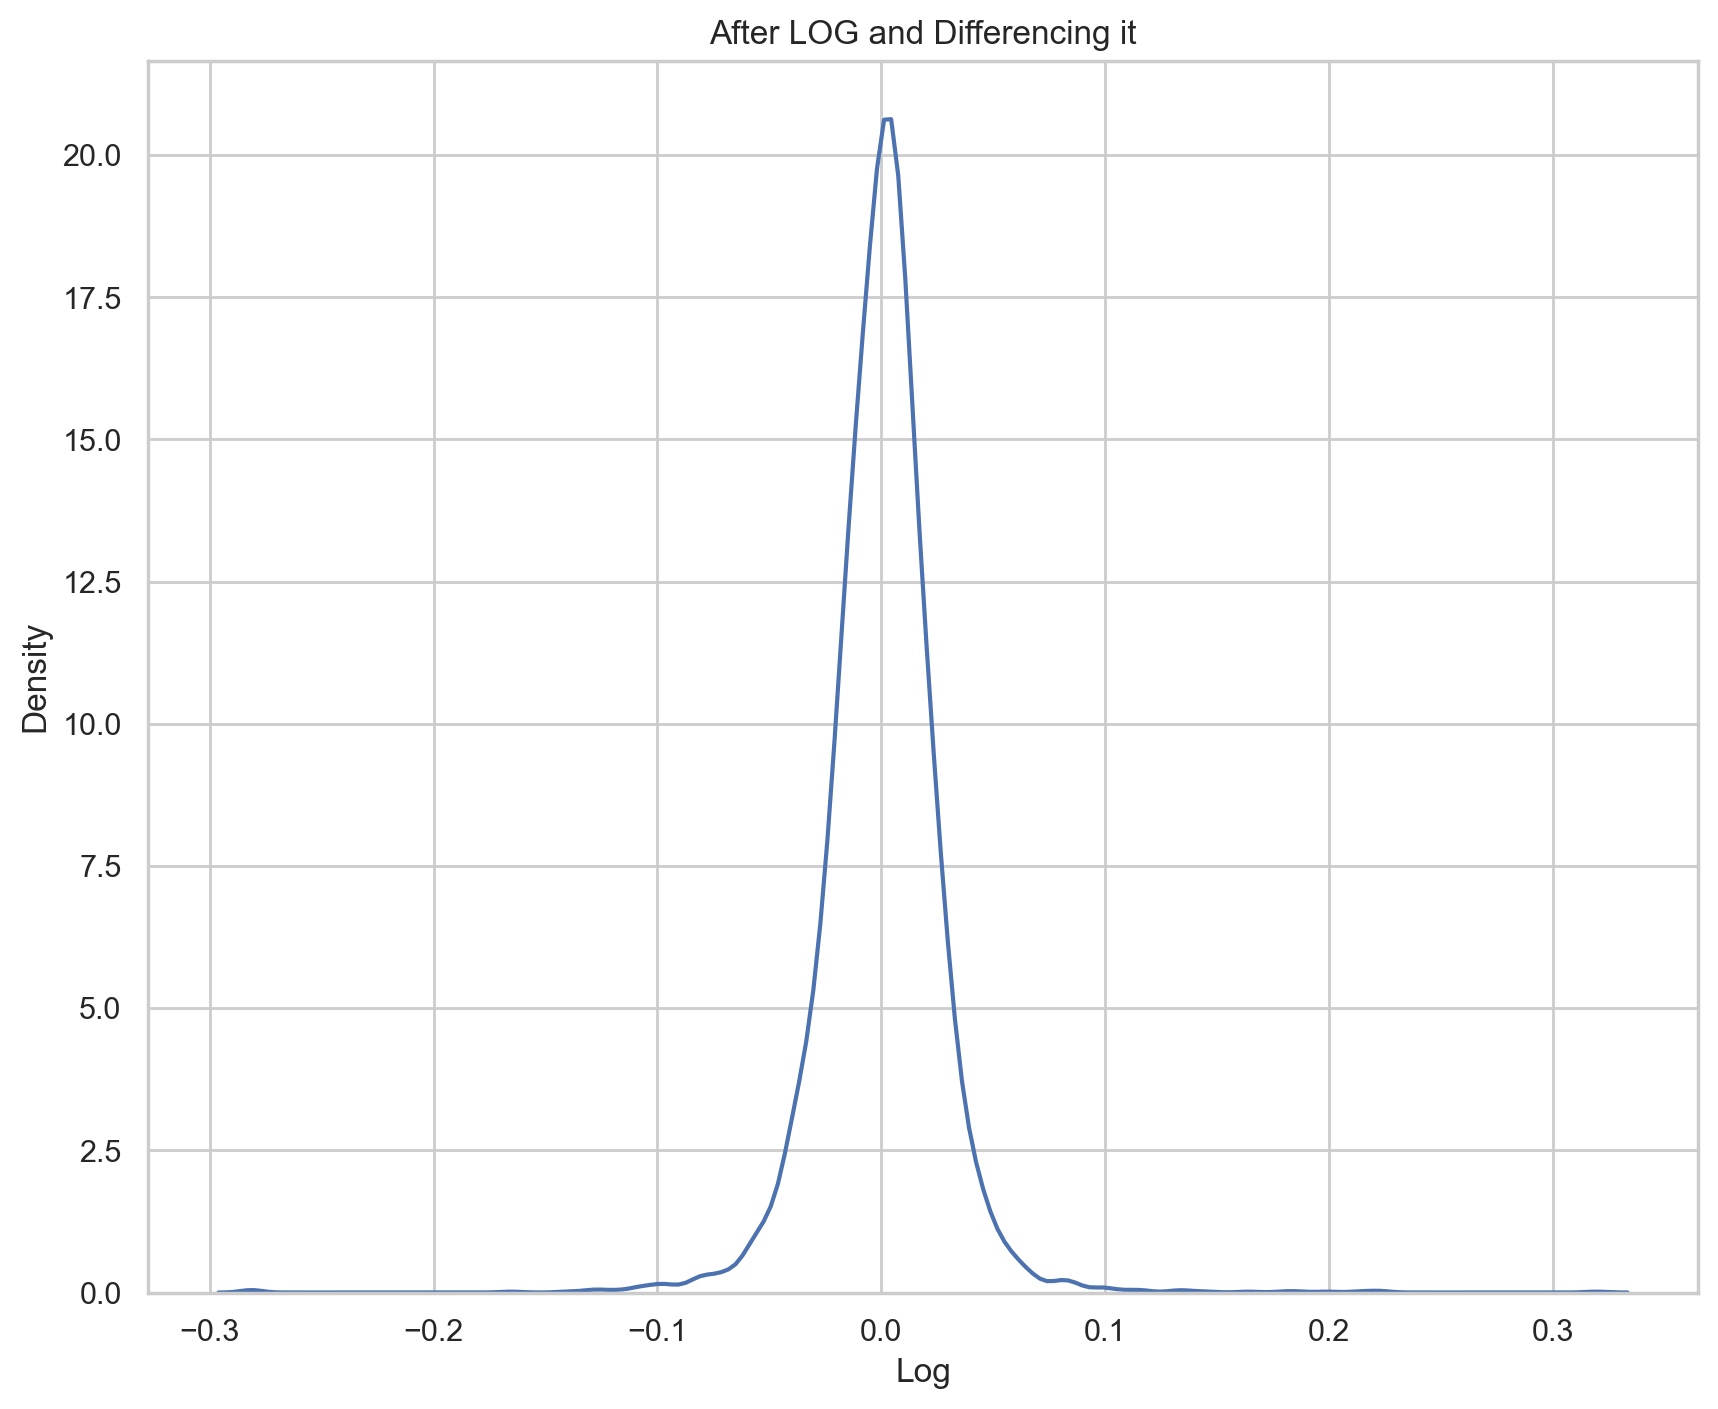

In [56]:
sns.kdeplot(data=difLog)
plt.title("After LOG and Differencing it")

Data is Normally distributed there is no skewness

In [57]:
import statsmodels.api as sm
import pylab as py

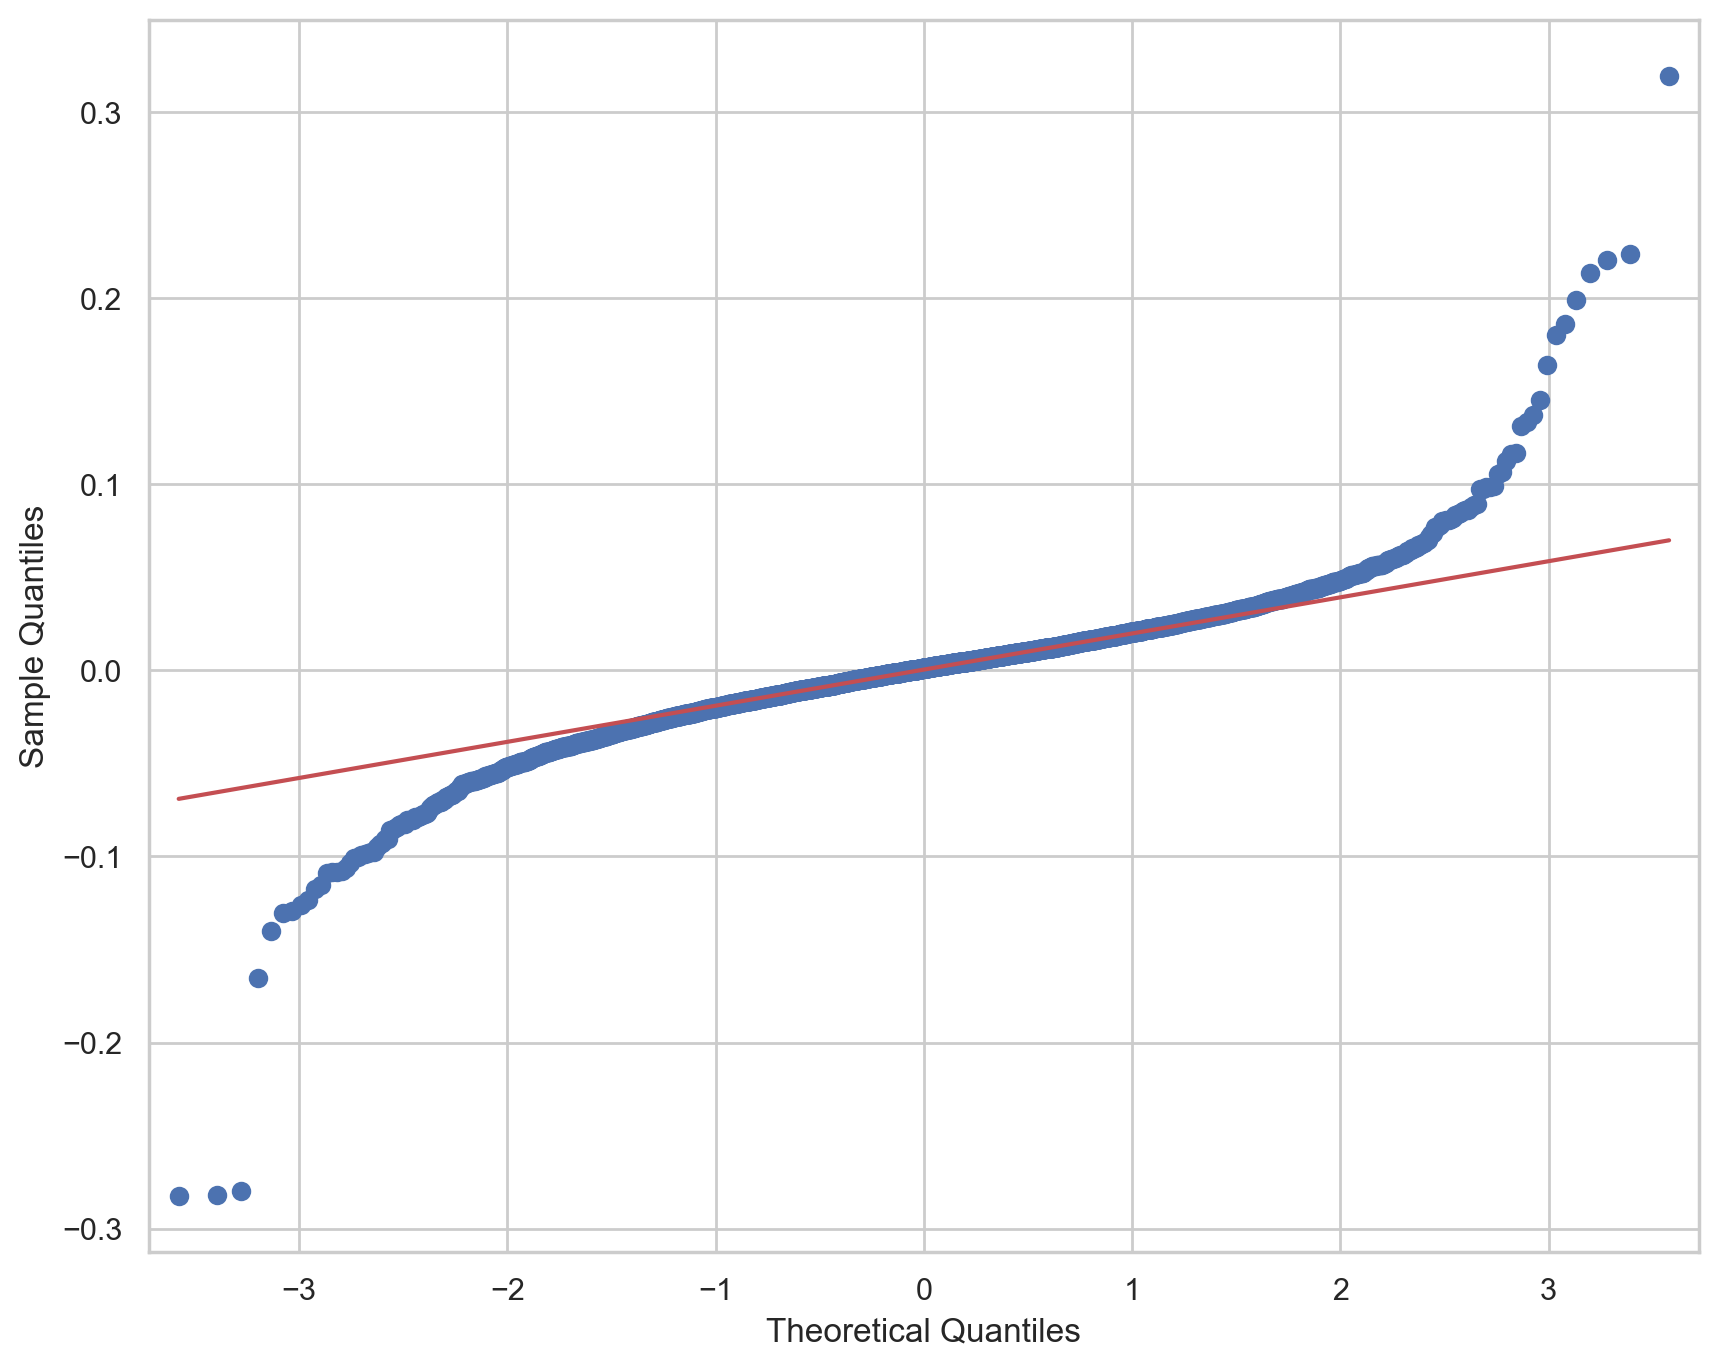

In [58]:
sm.qqplot(difLog,line='q')
py.show()

the points are much closer to the line in qq plot,indicating that the uniform distribution is a better fit.
So we got transformation after Differencing Log

# Model Building 

In [59]:
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import keras
import h5py
import requests
import os

In [60]:
# convert an array of values into a dataset matrix
# let us give lookback as 0 from our previous ACF plot of LOGDif
def create_dataset(data, look_back=0):
    dataX = []
    dataY = []
    for i in range(len(data) - look_back):
        a = data.iloc[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(data.iloc[i+look_back])
    return np.array(dataX), np.array(dataY)

In [61]:
Transform.head()

,Log,LOGDif
Date,,
2001-01-02,3.303217,NaN
2001-01-03,3.330417,0.027200
2001-01-04,3.339322,0.008905
2001-01-05,3.332205,-0.007117
2001-01-08,3.308717,-0.023488


In [62]:
# here LOGDif first value is nan so let us replace it with 0 for calculation purpose
Transform.LOGDif.iloc[0]=0
Transform.LOGDif.iloc[0]

0.0

In [63]:
train_data=Transform['LOGDif'].iloc[0:5000]
test_data=Transform['LOGDif'].iloc[5000:5796]

In [64]:
x_train, y_train = create_dataset(train_data, look_back=0)
x_test, y_test = create_dataset(test_data, look_back=0)

In [65]:
# Reshape the input data
x_train = np.reshape(x_train, (x_train.shape[0],1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [66]:
# Build the LSTM model
look_back = 0
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

25/25 [==============================] - 0s 3ms/step


In [68]:
#split transform dataframe
Trn=Transform.iloc[:5000]
Tst=Transform.iloc[5000:]

In [69]:
Trn.Log[0]

3.3032170013511957

In [70]:
# Reverse the predicted values of test data to actual form
testPredictlist = []
testPredictlist.append(Tst.Log[0])  # Initialize with the first value of the log-transformed series

for i in range(1, len(Tst)):
    testPredictlist.append(testPredictlist[i-1] + testPredict[i-1][0])

testPredict = np.array(testPredictlist)
testPredict = np.exp(testPredict)


In [71]:
len(Trn)==len(trainPredict)

True

In [72]:
# Reverse the predicted values of train data to actual form
trainPredictlist = []

for i in range(len(Trn)):
    if i == 0:
        trainPredictlist.append(Trn.Log[0])
    else:
        trainPredictlist.append(trainPredictlist[i-1] + trainPredict[i-1][0])

trainPredict = np.array(trainPredictlist)
trainPredict = np.exp(trainPredict)

trainPredict

array([27.20000076, 27.20000076, 27.20000076, ..., 27.20000076,
       27.20000076, 27.20000076])

In [73]:
testPredict

array([45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27999878,
       45.27999878, 45.27999878, 45.27999878, 45.27999878, 45.27

In [74]:
# create dataframe for predicted values
pred_testpredict=pd.DataFrame(columns=['Price'],index=Tst.index)
pred_testpredict['Price']=testPredict
pred_testpredict

,Price
Date,
2020-12-02,45.279999
2020-12-03,45.279999
2020-12-04,45.279999
2020-12-07,45.279999
2020-12-08,45.279999
...,...
2024-01-25,45.279999
2024-01-26,45.279999
2024-01-29,45.279999


In [75]:
#cehck the model's performence using RMSE values
trainScore = np.sqrt(mean_squared_error(oil.iloc[:5000,0], trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(oil.iloc[5000:,0], testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 43.72 RMSE
Test Score: 36.82 RMSE


So  based on above plots we confirmed that LSTM is the best model. After considering the plot and RMSE we can see that LSTM perform well as per graph and RMSE 